<a href="https://colab.research.google.com/github/AlexRc11/P.ASE/blob/main/Tasa_bruta_de_natalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount("/content/gdrive")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/gdrive


In [ ]:
#carga el df de las proyecciones, tasa especifica de nacimientos y fecundidad
dfNac = pd.read_csv('/content/gdrive/MyDrive/Datos ASE/Proyecciones/tef_nac_proyecciones.csv', encoding='ISO-8859-1')
#carga el df de las proyecciones, poblacion a mitad de año
dfPMit = pd.read_csv('/content/gdrive/MyDrive/Datos ASE/Proyecciones/pob_mit_proyecciones.csv', encoding='ISO-8859-1')
#carga el df de las proyecciones, de defunciones
dfDef = pd.read_csv('/content/gdrive/MyDrive/Datos ASE/Proyecciones/def_edad_proyecciones_n.csv')
#carga el df de las proyecciones, poblacion a inicio de año
dfP = pd.read_csv('/content/gdrive/MyDrive/Datos ASE/Proyecciones/pob_ini_proyecciones.csv', encoding='ISO-8859-1')
#carga el df de las proyecciones, esperanza de vida por sexo
dfES = pd.read_csv('/content/gdrive/MyDrive/Datos ASE/Proyecciones/prot_san_sal_ev_sex_proyecciones.csv', encoding='ISO-8859-1')
#carga el df de las proyecciones, esperanza de vida total
dfE = pd.read_csv('/content/gdrive/MyDrive/Datos ASE/Proyecciones/prot_san_sal_ev_proyecciones.csv', encoding='ISO-8859-1')

##Los datos estan separados por CVE_GEO que es correspondiente a la clave AGEE del siguiente link https://www.inegi.org.mx/app/ageeml/ y tomando como 0 al total del pais, es de tipo numerico. De 0-32
##El AÑO corresponde al año es de tipo numerico 1950-2050
##ENTIDAD corresponde al estado es de tipo cadena de caracteres. República Mexicana-Zacatecas
##La EDAD es la edad de la poblacion 0-109
##SEXO es de tipo cadena de caracter. Hombres-Mujeres
##POBLACION la cantidad de poblacion que cuenta con las variables del dataframe. Tipo entero
##NACIMIENTOS es el numero de nacimientos que cuenta con las variables del dataframe. Tipo entero
##DEFUNCIONES es el numero de defunciones que cuenta con las variables del dataframe. Tipo entero
##EV es la esperanza de vida. Tipo flotante

In [ ]:
dfPMit.head()

RENGLON   AÑO             ENTIDAD  CVE_GEO  EDAD     SEXO  POBLACION
0        1  1950  República Mexicana        0     0  Hombres     572103
1        2  1950  República Mexicana        0     0  Mujeres     559162
2        3  1950  República Mexicana        0     1  Hombres     514540
3        4  1950  República Mexicana        0     1  Mujeres     505269
4        5  1950  República Mexicana        0     2  Hombres     478546

In [ ]:
dfPMit.tail()

RENGLON   AÑO    ENTIDAD  CVE_GEO  EDAD     SEXO  POBLACION
592455   592456  2050  Zacatecas       32   107  Mujeres          4
592456   592457  2050  Zacatecas       32   108  Hombres          1
592457   592458  2050  Zacatecas       32   108  Mujeres          2
592458   592459  2050  Zacatecas       32   109  Hombres          0
592459   592460  2050  Zacatecas       32   109  Mujeres          1

In [ ]:
dfP.head()

RENGLON   AÑO             ENTIDAD  CVE_GEO  EDAD     SEXO  POBLACION
0        1  1950  República Mexicana        0     0  Hombres     564510
1        2  1950  República Mexicana        0     0  Mujeres     552054
2        3  1950  República Mexicana        0     1  Hombres     505655
3        4  1950  República Mexicana        0     1  Mujeres     496559
4        5  1950  República Mexicana        0     2  Hombres     470139

In [ ]:
dfP.tail()

RENGLON   AÑO    ENTIDAD  CVE_GEO  EDAD     SEXO  POBLACION
599715   599716  2051  Zacatecas       32   107  Mujeres          4
599716   599717  2051  Zacatecas       32   108  Hombres          1
599717   599718  2051  Zacatecas       32   108  Mujeres          2
599718   599719  2051  Zacatecas       32   109  Hombres          0
599719   599720  2051  Zacatecas       32   109  Mujeres          1

In [ ]:
dfNac.head()

RENGLON   AÑO             ENTIDAD  CVE_GEO GPO_EDAD  TASAS (1)  NACIMIENTOS
0        1  1950  República Mexicana        0    15-19     149.49       202465
1        2  1951  República Mexicana        0    15-19     152.02       210795
2        3  1952  República Mexicana        0    15-19     153.13       217474
3        4  1953  República Mexicana        0    15-19     154.67       225197
4        5  1954  República Mexicana        0    15-19     154.93       231595

In [ ]:
dfNac.tail()

RENGLON   AÑO    ENTIDAD  CVE_GEO GPO_EDAD  TASAS (1)  NACIMIENTOS
18846    18847  2050  Zacatecas       32    25-29      95.49         6163
18847    18848  2050  Zacatecas       32    30-34      73.37         4776
18848    18849  2050  Zacatecas       32    35-39      38.40         2519
18849    18850  2050  Zacatecas       32    40-44      10.28          650
18850    18851  2050  Zacatecas       32    45-49       0.80           48

In [ ]:
dfNac['GPO_EDAD'].unique()

array(['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49'],
      dtype=object)

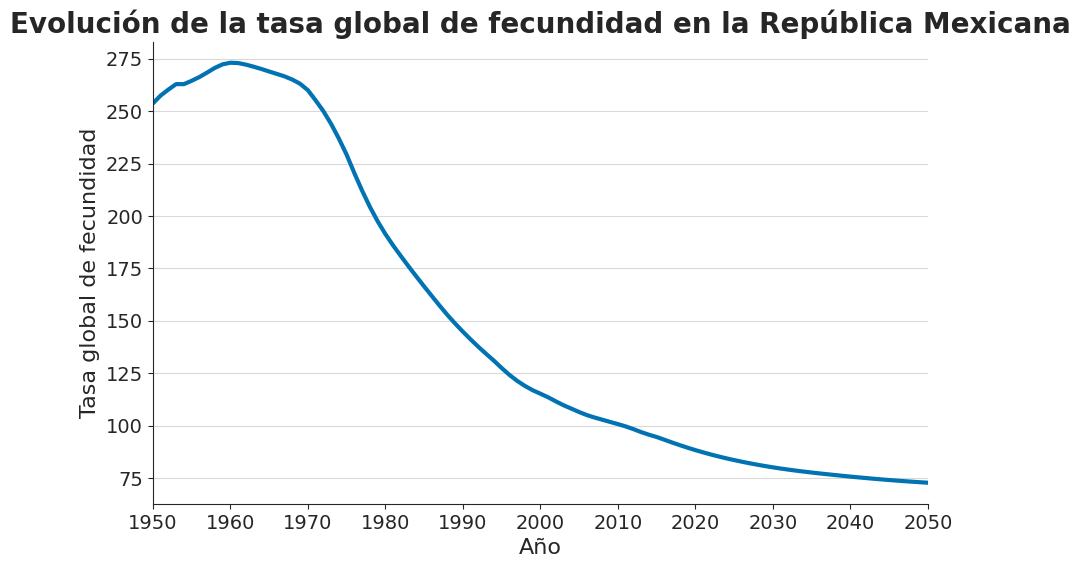

In [ ]:
dftf = dfNac[(dfNac["ENTIDAD"] == "República Mexicana") & (dfNac["GPO_EDAD"].isin(["15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49"]))]

# Calcular la tasa global de fecundidad por año
tasa_global_fecundidad = dftf.groupby("AÑO").apply(lambda x: (x["TASAS (1)"] * x["NACIMIENTOS"]).sum() / x["NACIMIENTOS"].sum())

# Establecer el estilo del gráfico
sns.set_style("ticks")
sns.set_palette("colorblind")

# Crear un gráfico de línea para mostrar la evolución de la tasa global de fecundidad
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(tasa_global_fecundidad.index, tasa_global_fecundidad.values, linewidth=3)

# Establecer el título y las etiquetas de los ejes
ax.set_title("Evolución de la tasa global de fecundidad en la República Mexicana", fontsize=20, fontweight="bold")
ax.set_xlabel("Año", fontsize=16)
ax.set_ylabel("Tasa global de fecundidad", fontsize=16)

# Establecer los límites de los ejes y las marcas del eje x
ax.set_xlim(1950, 2050)
ax.set_xticks(range(1950, 2051, 10))
ax.tick_params(axis="both", which="major", labelsize=14)

# Agregar una cuadrícula de fondo
sns.despine()
ax.grid(True, axis="y", color="gray", alpha=0.3)

# Mostrar el gráfico
plt.show()

In [ ]:
#TASA GLOBAL DE FECUNDIDAD 1950-2020
# seleccionar las columnas necesarias
dfNac = dfNac[["AÑO", "TASAS (1)"]]

# filtrar los datos
dfNac = dfNac[dfNac["ENTIDAD"]=="República Mexicana"]
dfNac = dfNac[dfNac["GPO_EDAD"]=="0"]

# agrupar los datos por año y calcular la media de las tasas de fecundidad para cada año
dfNac = dfNac.groupby("AÑO").mean().reset_index()

# crear un gráfico de línea para visualizar la tasa global de fecundidad a lo largo del tiempo
plt.plot(dftf["AÑO"], dftf["TASAS (1)"])
plt.xlabel("Año")
plt.ylabel("Tasa global de fecundidad")
plt.title("Tasa global de fecundidad en México, 1950-2050")
plt.show()

In [ ]:
dfDef.head()

RENGLON   AÑO             ENTIDAD  CVE_GEO     SEXO  EDAD  DEFUNCIONES
0        1  1950  República Mexicana        0  Hombres     0        87847
1        2  1950  República Mexicana        0  Mujeres     0        73541
2        3  1950  República Mexicana        0  Hombres     1        26324
3        4  1950  República Mexicana        0  Mujeres     1        26456
4        5  1950  República Mexicana        0  Hombres     2        13078

In [ ]:
dfDef.tail()

RENGLON   AÑO    ENTIDAD  CVE_GEO     SEXO  EDAD  DEFUNCIONES
592455   592456  2050  Zacatecas       32  Mujeres   107            2
592456   592457  2050  Zacatecas       32  Hombres   108            0
592457   592458  2050  Zacatecas       32  Mujeres   108            1
592458   592459  2050  Zacatecas       32  Hombres   109            1
592459   592460  2050  Zacatecas       32  Mujeres   109            2

In [ ]:
dfES.head()

RENGLON   AÑO             ENTIDAD  CVE_GEO    SEXO     EV
0        1  1950  República Mexicana        0  Hombre  45.91
1        2  1951  República Mexicana        0  Hombre  45.53
2        3  1952  República Mexicana        0  Hombre  47.52
3        4  1953  República Mexicana        0  Hombre  46.88
4        5  1954  República Mexicana        0  Hombre  50.51

In [ ]:
dfES.tail()

RENGLON   AÑO    ENTIDAD  CVE_GEO   SEXO     EV
5381     5382  2046  Zacatecas       32  Mujer  82.03
5382     5383  2047  Zacatecas       32  Mujer  82.17
5383     5384  2048  Zacatecas       32  Mujer  82.31
5384     5385  2049  Zacatecas       32  Mujer  82.45
5385     5386  2050  Zacatecas       32  Mujer  82.59

In [ ]:
dfE.head()

RENGLON   AÑO             ENTIDAD  CVE_GEO     EV
0        1  1950  República Mexicana        0  47.34
1        2  1951  República Mexicana        0  46.90
2        3  1952  República Mexicana        0  48.98
3        4  1953  República Mexicana        0  48.36
4        5  1954  República Mexicana        0  52.00

In [ ]:
dfE.tail()

RENGLON   AÑO    ENTIDAD  CVE_GEO     EV
2688     2689  2046  Zacatecas       32  78.97
2689     2690  2047  Zacatecas       32  79.11
2690     2691  2048  Zacatecas       32  79.25
2691     2692  2049  Zacatecas       32  79.39
2692     2693  2050  Zacatecas       32  79.53

In [ ]:
dfNac.shape

(18851, 7)

In [ ]:
dfPMit.shape

(592460, 7)

In [ ]:
dfP.shape

(599720, 7)

In [ ]:
dfDef.shape

(592460, 7)

In [ ]:
dfES.shape

(5386, 6)

In [ ]:
dfE.shape

(2693, 5)

In [ ]:
# Agrupar los datos por año y sumar la población
df_poblacion_agrupada = dfP.groupby(['AÑO', 'CVE_GEO'])['POBLACION'].sum().reset_index()

# Crear un nuevo dataframe con las columnas año, cve_geo y total poblacion
df_total_poblacion = pd.DataFrame(columns=['AÑO', 'CVE_GEO', 'TOTAL POBLACION'])

# Copiar las columnas de año y cve_geo del dataframe agrupado
df_total_poblacion['AÑO'] = df_poblacion_agrupada['AÑO']
df_total_poblacion['CVE_GEO'] = df_poblacion_agrupada['CVE_GEO']

# Copiar la columna de población sumada al nuevo dataframe
df_total_poblacion['TOTAL POBLACION'] = df_poblacion_agrupada['POBLACION']

# Imprimir el nuevo dataframe
print(df_total_poblacion)
pob_2020 = df_total_poblacion.loc[df_total_poblacion["AÑO"] == 2020, "TOTAL POBLACION"].values[0]
pob_2020

       AÑO  CVE_GEO  TOTAL POBLACION
0     1950        0         26655054
1     1951        0         27397996
2     1952        0         28162168
3     1953        0         28995019
4     1954        0         29842856
...    ...      ...              ...
2721  2051       28          4233521
2722  2051       29          1685717
2723  2051       30          8920597
2724  2051       31          2790022
2725  2051       32          1881709

[2726 rows x 3 columns]


127191826

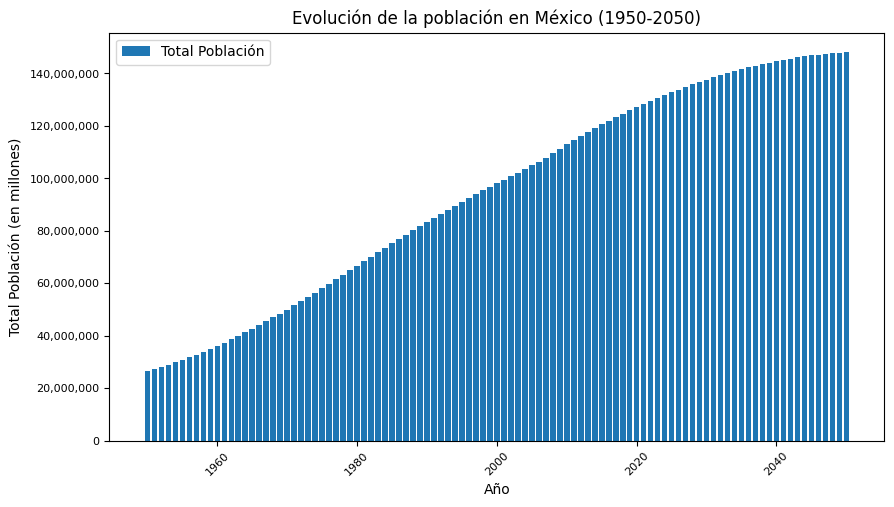

In [ ]:
dfmexp = df_total_poblacion[df_total_poblacion["CVE_GEO"] == 0]
dffilt = dfmexp[(dfmexp["AÑO"] >= 1950) & (dfmexp["AÑO"] <= 2050) & (dfmexp["CVE_GEO"] == 0)]
# Crear la gráfica de barras
plt.bar(dffilt["AÑO"], dffilt["TOTAL POBLACION"])

# Agregar etiquetas a los ejes
plt.title("Evolución de la población en México (1950-2050)")
plt.xlabel("Año")
plt.ylabel("Total Población (en millones)")
plt.legend(["Total Población"])

# Ajustar tamaño de fuente y tamaño de figura
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.subplots_adjust(bottom=0.2)
plt.rcParams["figure.figsize"] = (10,6)
plt.gca().get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Mostrar la gráfica
plt.show()

In [ ]:
dfmexp

In [ ]:
# Definir la lista de entidades federativas
entidades = range(1, 33)

# Crear una figura para cada entidad federativa
for entidad in entidades:
    # Filtrar los datos correspondientes a la entidad federativa actual
    dfmexp = df_total_poblacion[df_total_poblacion["CVE_GEO"] == entidad]
    dffilt = dfmexp[(dfmexp["AÑO"] >= 1970) & (dfmexp["AÑO"] <= 2050) & (dfmexp["CVE_GEO"] == entidad)]
    
    # Crear la gráfica de barras
    plt.bar(dffilt["AÑO"], dffilt["TOTAL POBLACION"])
        
    # Agregar etiquetas a los ejes
    plt.title("Evolución de la población entidad federativa {}".format(entidad)+" (1970-2020)")
    plt.xlabel("Año")
    plt.ylabel("Total Población (en millones)")
    plt.legend(["Total Población"])

    # Ajustar tamaño de fuente y tamaño de figura
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    plt.subplots_adjust(bottom=0.2)
    plt.rcParams["figure.figsize"] = (10,6)
    plt.gca().get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    # Mostrar la gráfica
    plt.show()


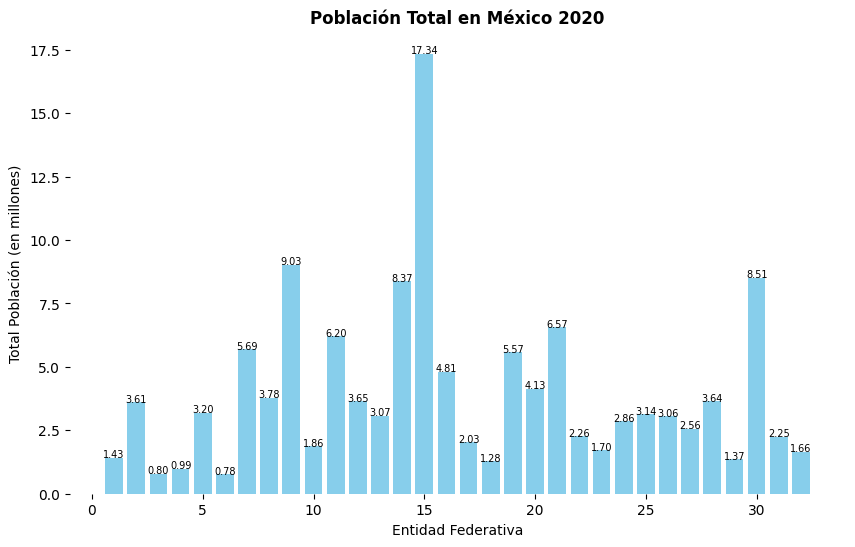

In [ ]:
# Filtrar los datos para el año 2020 y la poblacion
df_filt = df_total_poblacion[(df_total_poblacion["AÑO"] == 2020) & (df_total_poblacion["CVE_GEO"] != 0)][["TOTAL POBLACION", "CVE_GEO"]]

# Dividir la población entre 1,000,000
df_filt["TOTAL POBLACION"] = df_filt["TOTAL POBLACION"] / 1000000

# Crear la figura y el eje
fig, ax = plt.subplots()

# Graficar los datos como un diagrama de barras con color skyblue y sin borde
ax.bar(df_filt["CVE_GEO"], df_filt["TOTAL POBLACION"], color="skyblue", edgecolor="none")

# Establecer el título de la gráfica
ax.set_title("Población Total en México 2020", fontweight="bold", fontsize=12)

# Establecer los nombres de los ejes
ax.set_xlabel("Entidad Federativa")
ax.set_ylabel("Total Población (en millones)")

# Agregar el valor de la tasa sobre cada barra con formato de 2 decimales y en negro
for x, y in zip(df_filt["CVE_GEO"], df_filt["TOTAL POBLACION"]):
    ax.text(x, y, "{:.2f}".format(y), ha="center", fontsize=7)

# Mostrar la figura
plt.box(False)
plt.show()


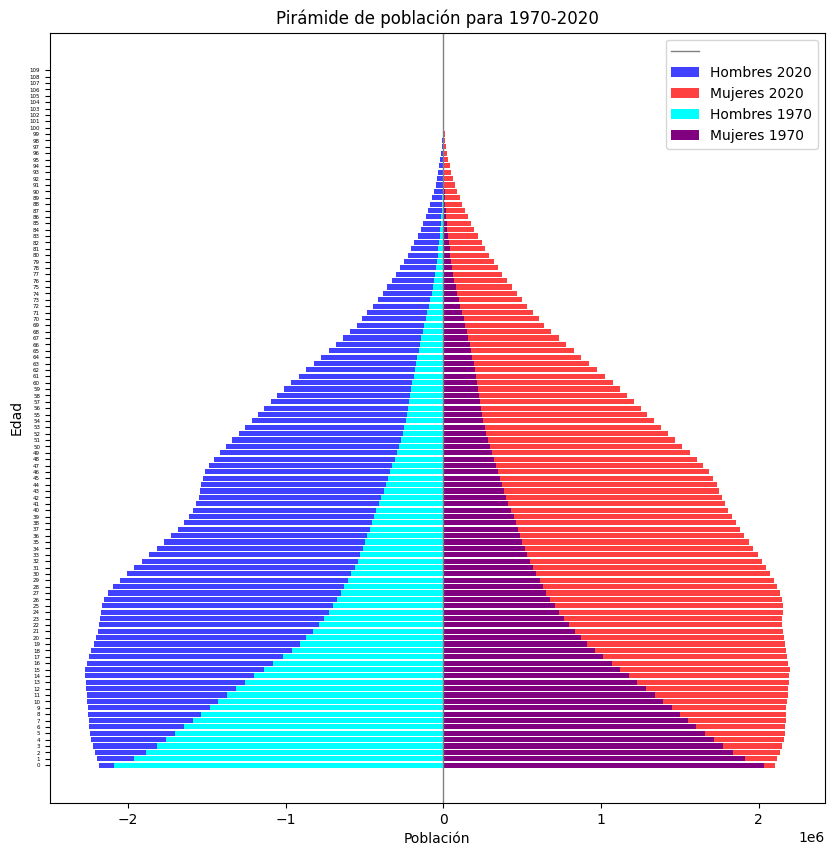

In [ ]:
# Filtra los datos para el año 2020 y 1970
df_2020 = dfP.loc[dfP['AÑO'] == 2020]
df_1970 = dfP.loc[dfP['AÑO'] == 1970]

# Selecciona solo las filas correspondientes a los datos de población masculina y femenina
poblacion_hombres = df_2020.loc[df_2020['SEXO'] == 'Hombres']
poblacion_mujeres = df_2020.loc[df_2020['SEXO'] == 'Mujeres']

poblacion_hombres1 = df_1970.loc[df_1970['SEXO'] == 'Hombres']
poblacion_mujeres1 = df_1970.loc[df_1970['SEXO'] == 'Mujeres']

# Agrupa los datos por edad y calcula la suma de la población en cada grupo de edad
poblacion_hombres = poblacion_hombres.groupby('EDAD')['POBLACION'].sum()
poblacion_mujeres = poblacion_mujeres.groupby('EDAD')['POBLACION'].sum()

poblacion_hombres1 = poblacion_hombres1.groupby('EDAD')['POBLACION'].sum()
poblacion_mujeres1 = poblacion_mujeres1.groupby('EDAD')['POBLACION'].sum()

# Crea la pirámide de población combinada
edades = poblacion_hombres.index.tolist()
fig, ax = plt.subplots(figsize=(10, 10))

# Barra de población masculina (invertida horizontalmente)
ax.barh(edades, -poblacion_hombres, align='center', color='blue', alpha=0.75)
# Barra de población femenina
ax.barh(edades, poblacion_mujeres, align='center', color='red', alpha=0.75)

# Barra de población masculina (invertida horizontalmente)
ax.barh(edades, -poblacion_hombres1, align='center', color='aqua', alpha=1)
# Barra de población femenina
ax.barh(edades, poblacion_mujeres1, align='center', color='purple', alpha=1)

ax.tick_params(axis='y', labelsize=4)
# Etiquetas de edad en el eje y
ax.set_yticks(edades)
ax.set_yticklabels(edades)

# Líneas de referencia de la mitad de la población
ax.axvline(0, color='gray', linewidth=1)

# Leyenda y títulos
ax.legend(['', 'Hombres 2020','Mujeres 2020', 'Hombres 1970','Mujeres 1970'])
ax.set(title='Pirámide de población para 1970-2020', xlabel='Población', ylabel='Edad')

plt.show()

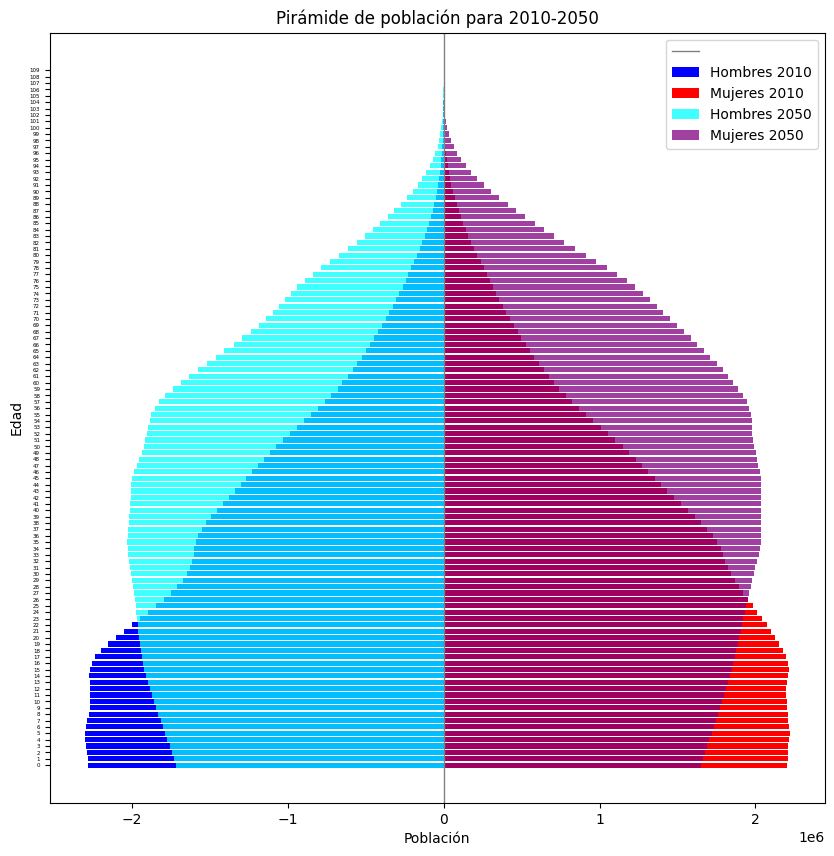

In [ ]:
# Filtra los datos para el año 2022
df_2010 = dfP.loc[dfP['AÑO'] == 2010]
df_2050 = dfP.loc[dfP['AÑO'] == 2050]

# Selecciona solo las filas correspondientes a los datos de población masculina y femenina
poblacion_hombres = df_2010.loc[df_2010['SEXO'] == 'Hombres']
poblacion_mujeres = df_2010.loc[df_2010['SEXO'] == 'Mujeres']

poblacion_hombres1 = df_2050.loc[df_2050['SEXO'] == 'Hombres']
poblacion_mujeres1 = df_2050.loc[df_2050['SEXO'] == 'Mujeres']

# Agrupa los datos por edad y calcula la suma de la población en cada grupo de edad
poblacion_hombres = poblacion_hombres.groupby('EDAD')['POBLACION'].sum()
poblacion_mujeres = poblacion_mujeres.groupby('EDAD')['POBLACION'].sum()

poblacion_hombres1 = poblacion_hombres1.groupby('EDAD')['POBLACION'].sum()
poblacion_mujeres1 = poblacion_mujeres1.groupby('EDAD')['POBLACION'].sum()

# Crea la pirámide de población combinada
edades = poblacion_hombres.index.tolist()
fig, ax = plt.subplots(figsize=(10, 10))

# Barra de población masculina (invertida horizontalmente)
ax.barh(edades, -poblacion_hombres, align='center', color='blue', alpha=1)
# Barra de población femenina
ax.barh(edades, poblacion_mujeres, align='center', color='red', alpha=1)

# Barra de población masculina (invertida horizontalmente)
ax.barh(edades, -poblacion_hombres1, align='center', color='aqua', alpha=0.75)
# Barra de población femenina
ax.barh(edades, poblacion_mujeres1, align='center', color='purple', alpha=0.75)

ax.tick_params(axis='y', labelsize=4)
# Etiquetas de edad en el eje y
ax.set_yticks(edades)
ax.set_yticklabels(edades)

# Líneas de referencia de la mitad de la población
ax.axvline(0, color='gray', linewidth=1)

# Leyenda y títulos
ax.legend(['', 'Hombres 2010','Mujeres 2010', 'Hombres 2050','Mujeres 2050'])
ax.set(title='Pirámide de población para 2010-2050', xlabel='Población', ylabel='Edad')

plt.show()

In [ ]:
#TASA BRUTA DE NATALIDAD por estado y año
anios = range(1950, 2051)
entidades = range(0, 33)
tasas = []
anios_lista = []
entidad_lista = []
for anio in anios:
  for entidad in entidades:
    TotalN = dfNac.loc[(dfNac['CVE_GEO'] == entidad) & (dfNac['AÑO'] == anio), 'NACIMIENTOS'].sum()
    TotalPMit = dfPMit.loc[(dfPMit['CVE_GEO'] == entidad) & (dfPMit['AÑO'] == anio), 'POBLACION'].sum()
    Total = (TotalN/TotalPMit)*1000
    tasas.append(Total)
    anios_lista.append(anio)
    entidad_lista.append(entidad)

dfNatalidad=pd.DataFrame({'año': anios_lista, 'tasa bruta de natalidad': tasas, 'entidad federativa': entidad_lista})
dfNatalidad

<ipython-input-4-d23580e264cc>:11: RuntimeWarning: invalid value encountered in long_scalars
  Total = (TotalN/TotalPMit)*1000


año  tasa bruta de natalidad  entidad federativa
0     1950                46.605021                   0
1     1950                      NaN                   1
2     1950                      NaN                   2
3     1950                      NaN                   3
4     1950                      NaN                   4
...    ...                      ...                 ...
3328  2050                12.734611                  28
3329  2050                11.270694                  29
3330  2050                10.938450                  30
3331  2050                10.302895                  31
3332  2050                12.943440                  32

[3333 rows x 3 columns]

In [ ]:
df_filt = dfNatalidad[(dfNatalidad['año'] >= 2050) & (dfNatalidad['entidad federativa'] != '0')]

# Encuentra la fila con la tasa de natalidad más alta
max = df_filt.loc[df_filt['tasa bruta de natalidad'].idxmax()]

# Imprime el estado y la tasa de natalidad más alta
print("El estado con la tasa bruta de natalidad más alta fue:", max['entidad federativa'])
print("La tasa bruta de natalidad más alta fue:", max['tasa bruta de natalidad'])

df_filt = dfNatalidad[(dfNatalidad['año'] == 2050) & (dfNatalidad['entidad federativa'] != '0')]

# Encuentra la fila con la tasa de natalidad más baja
min = df_filt.loc[df_filt['tasa bruta de natalidad'].idxmin()]

# Imprime el estado y la tasa de natalidad más baja
print("El estado con la tasa bruta de natalidad más baja fue:", min['entidad federativa'])
print("La tasa bruta de natalidad más baja fue:", min['tasa bruta de natalidad'])

El estado con la tasa bruta de natalidad más alta fue: 7.0
La tasa bruta de natalidad más alta fue: 16.362762478703416
El estado con la tasa bruta de natalidad más baja fue: 9.0
La tasa bruta de natalidad más baja fue: 7.362159889340724


In [ ]:
df_filt = dfDefunciones[(dfDefunciones['año'] >= 2050) & (dfDefunciones['entidad federativa'] != '0')]

# Encuentra la fila con la tasa de mortalidad más alta
max = df_filt.loc[df_filt['tasa bruta de mortalidad'].idxmax()]

# Imprime el estado y la tasa de mortalidad más alta
print("El estado con la tasa bruta de mortalidad más alta fue:", max['entidad federativa'])
print("La tasa bruta de mortalidad más alta fue:", max['tasa bruta de mortalidad'])

df_filt = dfDefunciones[(dfDefunciones['año'] == 2050) & (dfDefunciones['entidad federativa'] != '0')]

# Encuentra la fila con la tasa de mortalidad más baja
min = df_filt.loc[df_filt['tasa bruta de mortalidad'].idxmin()]

# Imprime el estado y la tasa de mortalidad más baja
print("El estado con la tasa bruta de mortalidad más baja fue:", min['entidad federativa'])
print("La tasa bruta de mortalidad más baja fue:", min['tasa bruta de mortalidad'])

El estado con la tasa bruta de mortalidad más alta fue: 9.0
La tasa bruta de mortalidad más alta fue: 12.914756134710688
El estado con la tasa bruta de mortalidad más baja fue: 7.0
La tasa bruta de mortalidad más baja fue: 6.733008865162463


In [ ]:
#TASA BRUTA DE MORTALIDAD por estado y año
anios = range(1950, 2051)
entidades = range(0, 33)
tasas = []
anios_lista = []
entidad_lista = []
for anio in anios:
  for entidad in entidades:
    TotalD = dfDef.loc[(dfDef['CVE_GEO'] == entidad) & (dfDef['AÑO'] == anio), 'DEFUNCIONES'].sum()
    TotalPMit = dfPMit.loc[(dfPMit['CVE_GEO'] == entidad) & (dfPMit['AÑO'] == anio), 'POBLACION'].sum()
    Total = (TotalD/TotalPMit)*1000
    tasas.append(Total)
    anios_lista.append(anio)
    entidad_lista.append(entidad)

dfDefunciones=pd.DataFrame({'año': anios_lista, 'tasa bruta de mortalidad': tasas, 'entidad federativa': entidad_lista})
dfDefunciones

<ipython-input-5-523cea31064a>:11: RuntimeWarning: invalid value encountered in long_scalars
  Total = (TotalD/TotalPMit)*1000


año  tasa bruta de mortalidad  entidad federativa
0     1950                 18.059263                   0
1     1950                       NaN                   1
2     1950                       NaN                   2
3     1950                       NaN                   3
4     1950                       NaN                   4
...    ...                       ...                 ...
3328  2050                  9.180184                  28
3329  2050                  8.648111                  29
3330  2050                 10.010117                  30
3331  2050                  9.357718                  31
3332  2050                  8.357965                  32

[3333 rows x 3 columns]

In [ ]:
df_conj = pd.DataFrame(columns=["año", "tasa bruta de mortalidad", "tasa bruta de natalidad"])
df_conj["tasa bruta de mortalidad"] = dfDefunciones["tasa bruta de mortalidad"]
df_conj["tasa bruta de natalidad"] = dfNatalidad["tasa bruta de natalidad"]
df_conj["año"] = dfNatalidad["año"]
df_conj["entidad federativa"] = dfNatalidad["entidad federativa"]
df_conj

año  tasa bruta de mortalidad  tasa bruta de natalidad  \
0     1950                 18.059263                46.605021   
1     1950                       NaN                      NaN   
2     1950                       NaN                      NaN   
3     1950                       NaN                      NaN   
4     1950                       NaN                      NaN   
...    ...                       ...                      ...   
3328  2050                  9.180184                12.734611   
3329  2050                  8.648111                11.270694   
3330  2050                 10.010117                10.938450   
3331  2050                  9.357718                10.302895   
3332  2050                  8.357965                12.943440   

      entidad federativa  
0                      0  
1                      1  
2                      2  
3                      3  
4                      4  
...                  ...  
3328                  28  
3329                  29  
3330                  30  
3331                  31  
3332                  32  

[3333 rows x 4 columns]

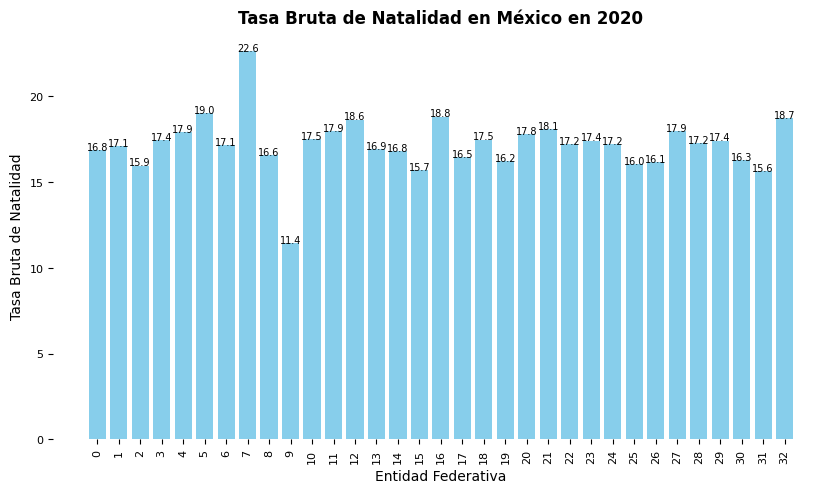

In [ ]:
# Filtrar los datos para el año 2020 y la tasa bruta de natalidad
df_filt = df_conj[df_conj["año"] == 2020][["tasa bruta de natalidad", "entidad federativa"]]

# Agrupar los datos por entidad federativa y sumar las tasas de natalidad
df_grouped = df_filt.groupby("entidad federativa").sum().reset_index()

# Crear la gráfica de barras
plt.bar(df_grouped["entidad federativa"], df_grouped["tasa bruta de natalidad"], color="skyblue")

# Agregar etiquetas a los ejes
plt.xlabel("Entidad Federativa")
plt.ylabel("Tasa Bruta de Natalidad")
plt.title("Tasa Bruta de Natalidad en México en 2020", fontweight="bold", fontsize=12)

# Ajustar tamaño de fuente y tamaño de figura
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.subplots_adjust(bottom=0.2)
plt.rcParams["figure.figsize"] = (10,6)
plt.xticks(range(len(df_grouped)), df_grouped["entidad federativa"])

# Agregar el valor de la tasa sobre cada barra con formato de 2 decimales y en negro
for i, v in enumerate(df_grouped["tasa bruta de natalidad"]):
    plt.text(i, v, "{:.1f}".format(v), color="black", ha='center', fontsize=7)

# Quitar borde de la gráfica y mostrar la gráfica
plt.box(False)
plt.show()


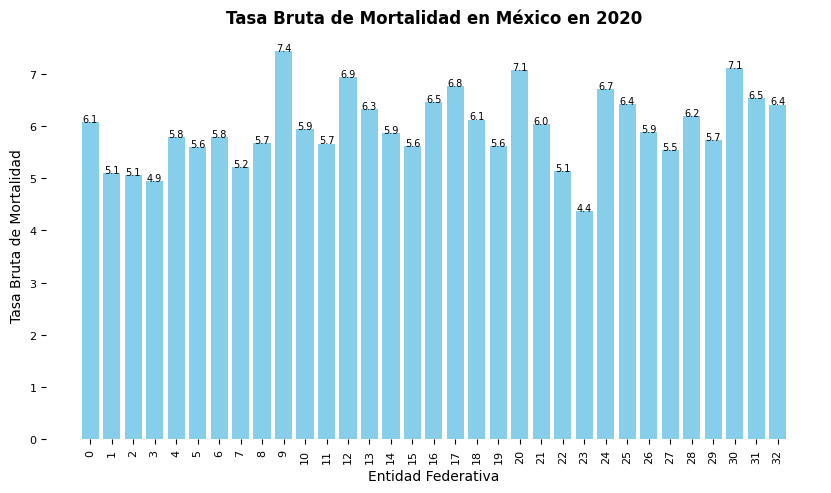

In [ ]:
# Filtrar los datos para el año 2020 y la tasa bruta de mortalidad
df_filt = df_conj[df_conj["año"] == 2020][["tasa bruta de mortalidad", "entidad federativa"]]

# Agrupar los datos por entidad federativa y sumar las tasas de mortalidad
df_grouped = df_filt.groupby("entidad federativa").sum().reset_index()

# Crear la gráfica de barras
plt.bar(df_grouped["entidad federativa"], df_grouped["tasa bruta de mortalidad"], color="skyblue")

# Agregar etiquetas a los ejes
plt.xlabel("Entidad Federativa")
plt.ylabel("Tasa Bruta de Mortalidad")
plt.title("Tasa Bruta de Mortalidad en México en 2020", fontweight="bold", fontsize=12)

# Ajustar tamaño de fuente y tamaño de figura
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.subplots_adjust(bottom=0.2)
plt.rcParams["figure.figsize"] = (10,6)
plt.xticks(range(len(df_grouped)), df_grouped["entidad federativa"])

# Agregar el valor de la tasa sobre cada barra con formato de 2 decimales y en negro
for i, v in enumerate(df_grouped["tasa bruta de mortalidad"]):
    plt.text(i, v, "{:.1f}".format(v), color="black", ha='center', fontsize=7)

# Quitar borde de la gráfica y mostrar la gráfica
plt.box(False)
plt.show()

In [ ]:
# Calcular el cambio porcentual de la tasa bruta de mortalidad
cambio_pct_mortalidad = df_conj["tasa bruta de mortalidad"].pct_change()
cambio_pct_natalidad = df_conj["tasa bruta de natalidad"].pct_change()

# Agregar la columna de cambio porcentual al dataframe
df_conj["cambio_natalidad"] = cambio_pct_natalidad
df_conj["cambio_mortalidad"] = cambio_pct_mortalidad

In [ ]:
df_conj

año  tasa bruta de mortalidad  tasa bruta de natalidad  \
0     1950                 18.059263                46.605021   
1     1950                       NaN                      NaN   
2     1950                       NaN                      NaN   
3     1950                       NaN                      NaN   
4     1950                       NaN                      NaN   
...    ...                       ...                      ...   
3328  2050                  9.180184                12.734611   
3329  2050                  8.648111                11.270694   
3330  2050                 10.010117                10.938450   
3331  2050                  9.357718                10.302895   
3332  2050                  8.357965                12.943440   

      entidad federativa  cambio_natalidad  cambio_mortalidad  
0                      0               NaN                NaN  
1                      1          0.000000           0.000000  
2                      2          0.000000           0.000000  
3                      3          0.000000           0.000000  
4                      4          0.000000           0.000000  
...                  ...               ...                ...  
3328                  28          0.011316           0.098195  
3329                  29         -0.114956          -0.057959  
3330                  30         -0.029479           0.157492  
3331                  31         -0.058103          -0.065174  
3332                  32          0.256292          -0.106837  

[3333 rows x 6 columns]

In [ ]:
mortalidad_1970 = df_conj.loc[df_conj["año"] == 1970, "tasa bruta de mortalidad"].values[0]
mortalidad_2020 = df_conj.loc[df_conj["año"] == 2020, "tasa bruta de mortalidad"].values[0]

# Calcular el cambio porcentual
cambio_pct = (mortalidad_2020 - mortalidad_1970) / mortalidad_1970 * 100

# Imprimir el resultado
print(f"El cambio porcentual de la tasa bruta de mortalidad entre 1970 y 2020 es de {cambio_pct:.2f}%")

El cambio porcentual de la tasa bruta de mortalidad entre 1970 y 2020 es de -41.24%


In [ ]:
natalidad_1970 = df_conj.loc[df_conj["año"] == 1970, "tasa bruta de natalidad"].values[0]
natalidad_2020 = df_conj.loc[df_conj["año"] == 2020, "tasa bruta de natalidad"].values[0]

# Calcular el cambio porcentual
cambio_pct = (natalidad_2020 - natalidad_1970) / natalidad_1970 * 100

# Imprimir el resultado
print(f"El cambio porcentual de la tasa bruta de natalidad entre 1970 y 2020 es de {cambio_pct:.2f}%")

El cambio porcentual de la tasa bruta de mortalidad entre 1970 y 2020 es de -61.54%


In [ ]:
df_filt = dfDefunciones[(dfDefunciones['año'] >= 2050) & (dfDefunciones['entidad federativa'] != '0')]

# Encuentra la fila con la tasa de mortalidad más alta
max = df_filt.loc[df_filt['tasa bruta de mortalidad'].idxmax()]

# Imprime el estado y la tasa de mortalidad más alta
print("El estado con la tasa bruta de mortalidad más alta fue:", max['entidad federativa'])
print("La tasa bruta de mortalidad más alta fue:", max['tasa bruta de mortalidad'])


df_filt = dfDefunciones[(dfDefunciones['año'] == 2050) & (dfDefunciones['entidad federativa'] != '0')]

# Encuentra la fila con la tasa de mortalidad más alta
min = df_filt.loc[df_filt['tasa bruta de mortalidad'].idxmin()]

# Imprime el estado y la tasa de mortalidad más alta
print("El estado con la tasa bruta de mortalidad más baja fue:", min['entidad federativa'])
print("La tasa bruta de mortalidad más baja fue:", min['tasa bruta de mortalidad'])

El estado con la tasa bruta de mortalidad más alta fue: 9.0
La tasa bruta de mortalidad más alta fue: 12.914756134710688
El estado con la tasa bruta de mortalidad más baja fue: 7.0
La tasa bruta de mortalidad más baja fue: 6.733008865162463


In [ ]:
#TASA BRUTA DE MORTALIDAD INFANTIL por estado y año
anios = range(1950, 2021)
entidades = range(0, 33)
tasas = []
anios_lista = []
entidad_lista = []
for anio in anios:
  for entidad in entidades:
    TotalDI = dfDef.loc[(dfDef['CVE_GEO'] == entidad) & (dfDef['AÑO'] == anio) & (dfDef['EDAD'] == 0), 'DEFUNCIONES'].sum()
    TotalPMit = dfPMit.loc[(dfP['CVE_GEO'] == entidad) & (dfP['AÑO'] == anio) & (dfP['EDAD'] == 0), 'POBLACION'].sum()
    Total = (TotalDI/TotalPMit)*1000
    tasas.append(Total)
    anios_lista.append(anio)
    entidad_lista.append(entidad)

dfDefuncionesInf=pd.DataFrame({'año': anios_lista, 'tasa de mortalidad infantil': tasas, 'entidad federativa': entidad_lista})
dfDefuncionesInf

<ipython-input-6-92644607ad6b>:11: RuntimeWarning: invalid value encountered in long_scalars
  Total = (TotalDI/TotalPMit)*1000
<ipython-input-6-92644607ad6b>:11: RuntimeWarning: divide by zero encountered in long_scalars
  Total = (TotalDI/TotalPMit)*1000


año  tasa de mortalidad infantil  entidad federativa
0     1950                   142.661534                   0
1     1950                          NaN                   1
2     1950                          NaN                   2
3     1950                          NaN                   3
4     1950                          NaN                   4
...    ...                          ...                 ...
2338  2020                    13.349537                  28
2339  2020                    17.218889                  29
2340  2020                    16.854564                  30
2341  2020                    10.912215                  31
2342  2020                          inf                  32

[2343 rows x 3 columns]

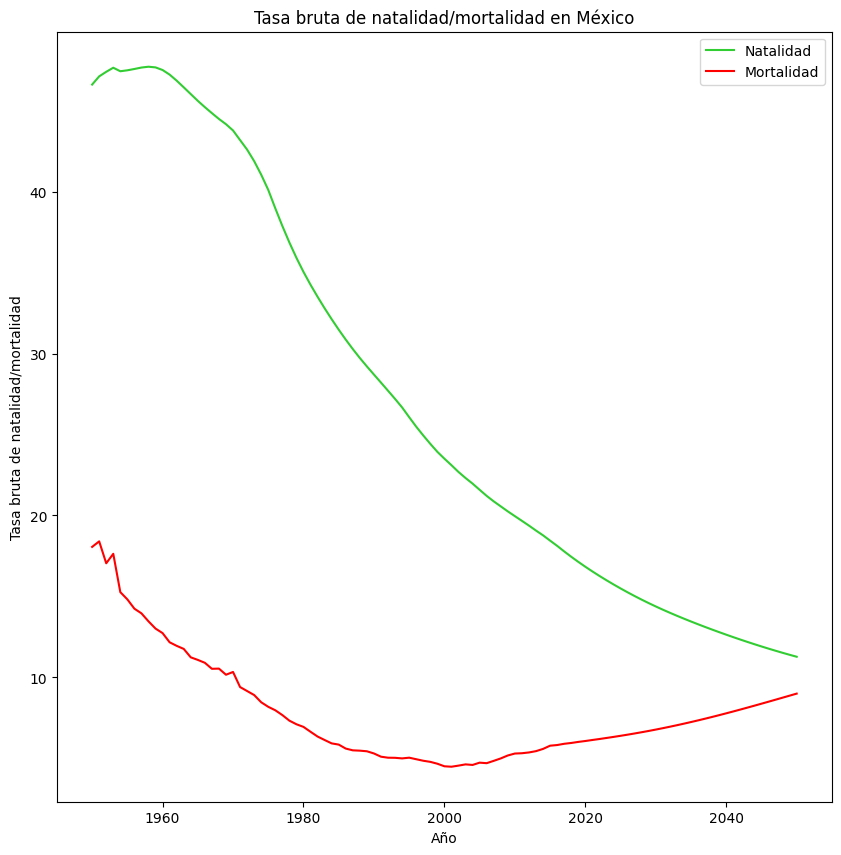

In [ ]:
df_mex_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 0]
df_mex_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 0]

plt.figure(figsize=(10,10))
plt.plot(df_mex_nat['año'], df_mex_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
plt.plot(df_mex_def['año'], df_mex_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
plt.xlabel('Año')
plt.ylabel('Tasa bruta de natalidad/mortalidad')
plt.title('Tasa bruta de natalidad/mortalidad en México')
plt.legend()

plt.show()

In [ ]:
df_filt = df_mex_def[df_mex_def['año'] > 2000]

# Encuentra la fila con la tasa de mortalidad más alta
max_row = df_filt.loc[df_filt['tasa bruta de mortalidad'].idxmax()]

# Imprime el año y la tasa de mortalidad más alta
print("El año con la tasa bruta de mortalidad más alta fue:", max_row['año'])
print("La tasa bruta de mortalidad más alta fue:", max_row['tasa bruta de mortalidad'])

El año con la tasa bruta de mortalidad más alta fue: 2050.0
La tasa bruta de mortalidad más alta fue: 9.000368761552641


In [ ]:
df_filt = df_mex_nat[df_mex_nat['año'] > 2000]

# Encuentra la fila con la tasa de mortalidad más alta
max_row = df_filt.loc[df_filt['tasa bruta de natalidad'].idxmin()]

# Imprime el año y la tasa de mortalidad más alta
print("El año con la tasa bruta de natalidad más baja fue:", max_row['año'])
print("La tasa bruta de natalidad más baja fue:", max_row['tasa bruta de natalidad'])

El año con la tasa bruta de natalidad más baja fue: 2050.0
La tasa bruta de natalidad más baja fue: 11.276780098324808


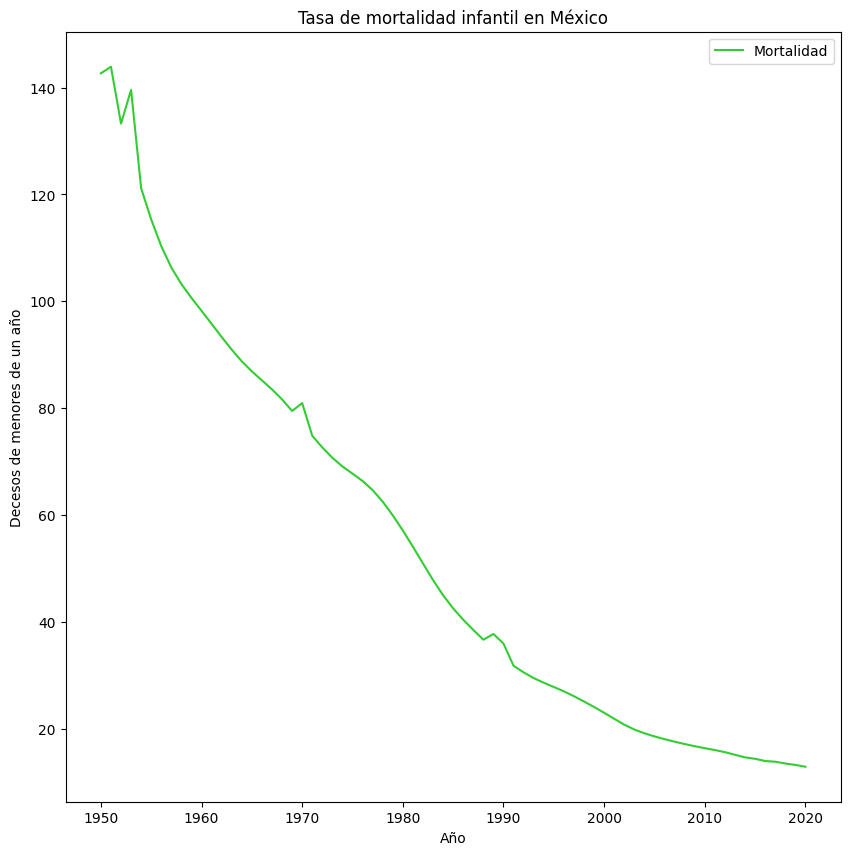

In [ ]:
df_mex_defInf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 0]

plt.figure(figsize=(10,10))
plt.plot(df_mex_defInf['año'], df_mex_defInf['tasa de mortalidad infantil'], color='limegreen', label='Mortalidad')
plt.xlabel('Año')
plt.ylabel('Decesos de menores de un año')
plt.title('Tasa de mortalidad infantil en México')
plt.legend()

plt.show()

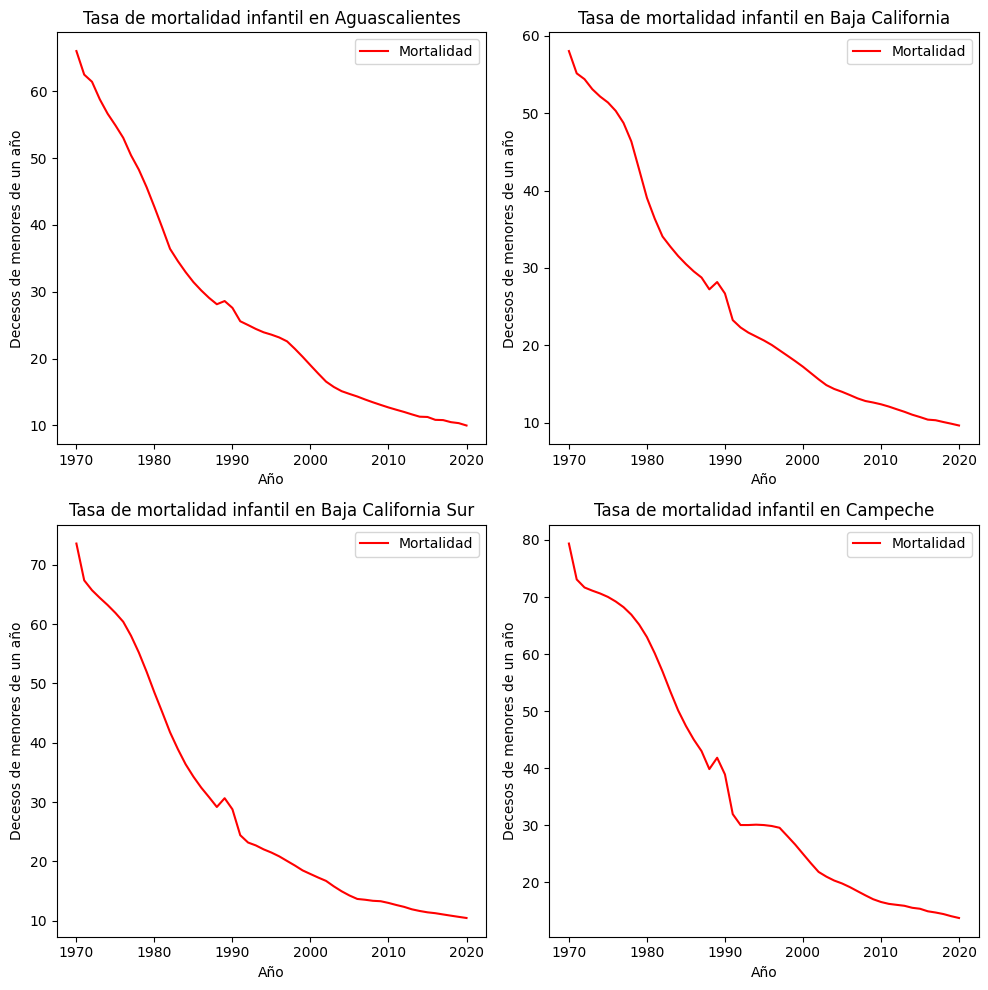

In [ ]:
# Filtrar los datos de cada estado
df_ags_defInf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 1]
df_baja_cal_defInf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 2]
df_baja_cal_sur_defInf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 3]
df_campeche_defInf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 4]

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Agregar los datos de Aguascalientes al primer subplot
axs[0,0].plot(df_ags_defInf['año'], df_ags_defInf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[0,0].set_xlabel('Año')
axs[0,0].set_ylabel('Decesos de menores de un año')
axs[0,0].set_title('Tasa de mortalidad infantil en Aguascalientes')
axs[0,0].legend()

# Agregar los datos de Baja California al segundo subplot
axs[0,1].plot(df_baja_cal_defInf['año'], df_baja_cal_defInf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[0,1].set_xlabel('Año')
axs[0,1].set_ylabel('Decesos de menores de un año')
axs[0,1].set_title('Tasa de mortalidad infantil en Baja California')
axs[0,1].legend()

# Agregar los datos de Baja California Sur al tercer subplot
axs[1,0].plot(df_baja_cal_sur_defInf['año'], df_baja_cal_sur_defInf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[1,0].set_xlabel('Año')
axs[1,0].set_ylabel('Decesos de menores de un año')
axs[1,0].set_title('Tasa de mortalidad infantil en Baja California Sur')
axs[1,0].legend()

# Agregar los datos de Campeche al cuarto subplot
axs[1,1].plot(df_campeche_defInf['año'], df_campeche_defInf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[1,1].set_xlabel('Año')
axs[1,1].set_ylabel('Decesos de menores de un año')
axs[1,1].set_title('Tasa de mortalidad infantil en Campeche')
axs[1,1].legend()

# Ajustar los espacios entre los subplots
fig.tight_layout()


plt.show()

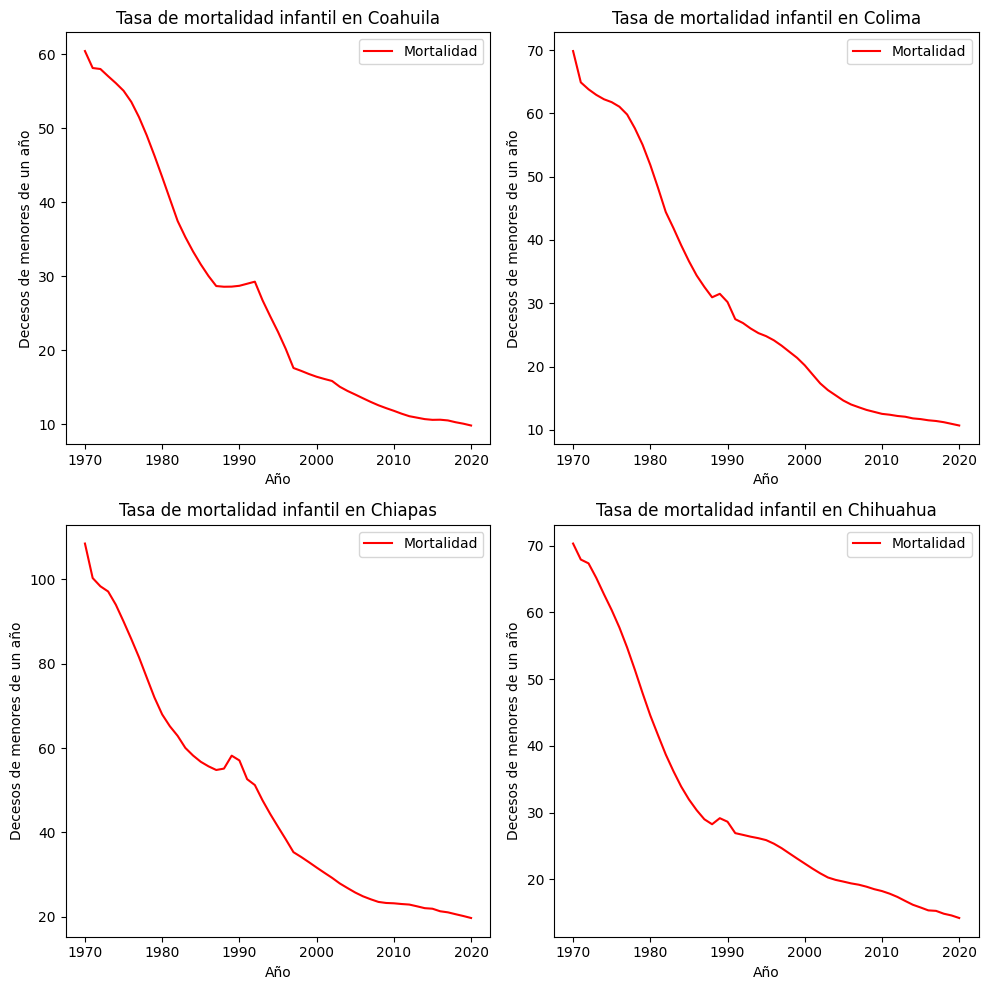

In [ ]:
# Filtrar los datos de cada estado
df_coahuila_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 5]
df_colima_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 6]
df_chiapas_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 7]
df_chihuahua_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 8]

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Agregar los datos de Coahuila al primer subplot
axs[0,0].plot(df_coahuila_definf['año'], df_coahuila_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[0,0].set_xlabel('Año')
axs[0,0].set_ylabel('Decesos de menores de un año')
axs[0,0].set_title('Tasa de mortalidad infantil en Coahuila')
axs[0,0].legend()

# Agregar los datos de Colima al segundo subplot
axs[0,1].plot(df_colima_definf['año'], df_colima_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[0,1].set_xlabel('Año')
axs[0,1].set_ylabel('Decesos de menores de un año')
axs[0,1].set_title('Tasa de mortalidad infantil en Colima')
axs[0,1].legend()

# Agregar los datos de Chiapas al tercer subplot
axs[1,0].plot(df_chiapas_definf['año'], df_chiapas_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[1,0].set_xlabel('Año')
axs[1,0].set_ylabel('Decesos de menores de un año')
axs[1,0].set_title('Tasa de mortalidad infantil en Chiapas')
axs[1,0].legend()

# Agregar los datos de Chihuahua al cuarto subplot
axs[1,1].plot(df_chihuahua_definf['año'], df_chihuahua_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[1,1].set_xlabel('Año')
axs[1,1].set_ylabel('Decesos de menores de un año')
axs[1,1].set_title('Tasa de mortalidad infantil en Chihuahua')
axs[1,1].legend()

# Ajustar los espacios entre los subplots
fig.tight_layout()

# Mostrar el gráfico
plt.show()

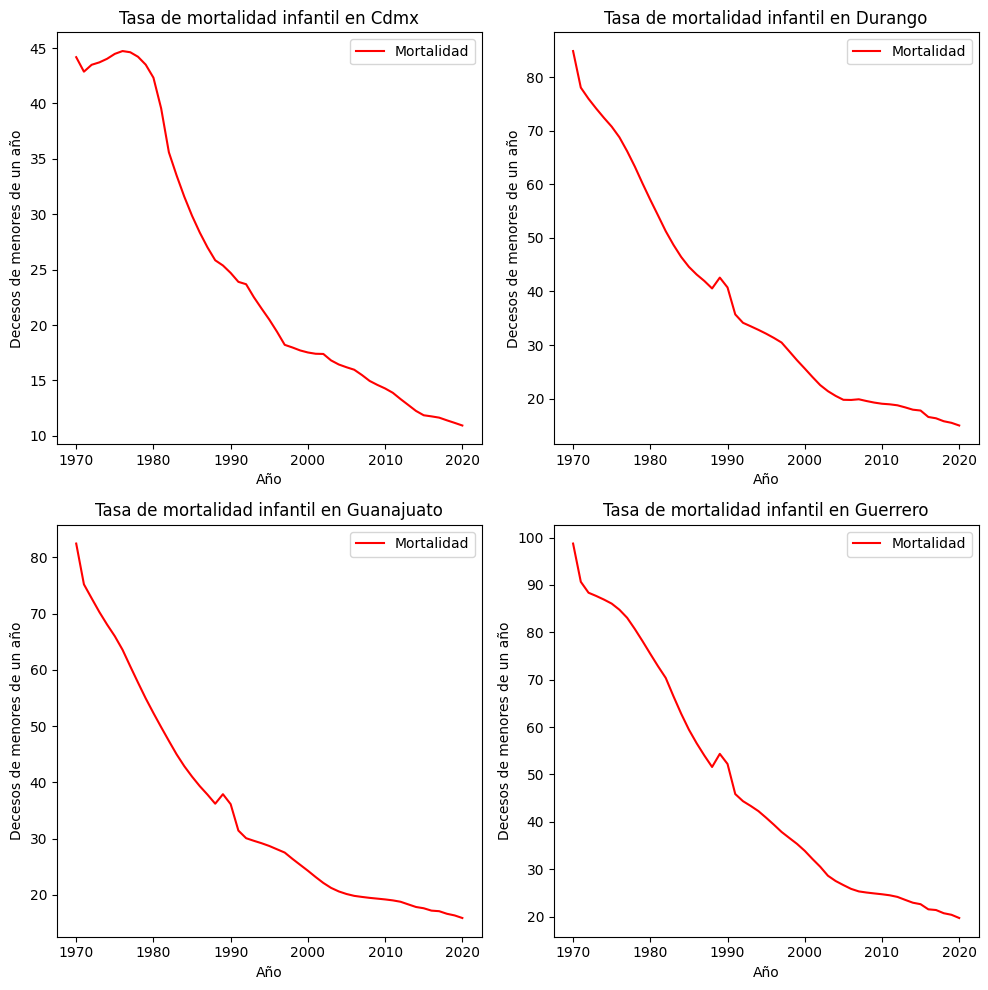

In [ ]:
# Filtrar los datos de cada estado
df_cdmx_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 9]
df_durango_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 10]
df_guanajuato_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 11]
df_guerrero_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 12]

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Agregar los datos de Cdmx al primer subplot
axs[0,0].plot(df_cdmx_definf['año'], df_cdmx_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[0,0].set_xlabel('Año')
axs[0,0].set_ylabel('Decesos de menores de un año')
axs[0,0].set_title('Tasa de mortalidad infantil en Cdmx')
axs[0,0].legend()

# Agregar los datos de Durango al segundo subplot
axs[0,1].plot(df_durango_definf['año'], df_durango_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[0,1].set_xlabel('Año')
axs[0,1].set_ylabel('Decesos de menores de un año')
axs[0,1].set_title('Tasa de mortalidad infantil en Durango')
axs[0,1].legend()

# Agregar los datos de Guanajuato al tercer subplot
axs[1,0].plot(df_guanajuato_definf['año'], df_guanajuato_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[1,0].set_xlabel('Año')
axs[1,0].set_ylabel('Decesos de menores de un año')
axs[1,0].set_title('Tasa de mortalidad infantil en Guanajuato')
axs[1,0].legend()

# Agregar los datos de Guerrero al cuarto subplot
axs[1,1].plot(df_guerrero_definf['año'], df_guerrero_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[1,1].set_xlabel('Año')
axs[1,1].set_ylabel('Decesos de menores de un año')
axs[1,1].set_title('Tasa de mortalidad infantil en Guerrero')
axs[1,1].legend()

# Ajustar los espacios entre los subplots
fig.tight_layout()

# Mostrar el gráfico
plt.show()

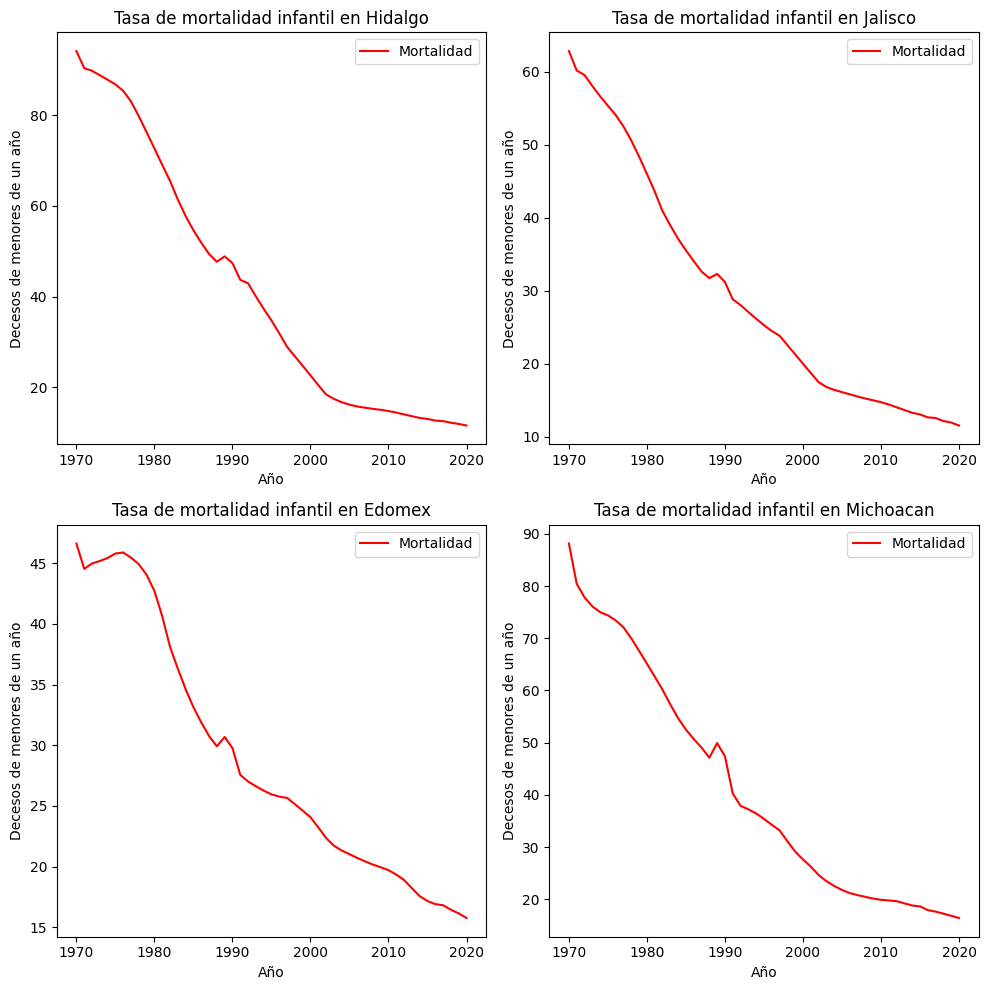

In [ ]:
# Filtrar los datos de cada estado
df_hidalgo_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 13]
df_jalisco_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 14]
df_edomex_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 15]
df_michoacan_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 16]

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Agregar los datos de Hidalgo al primer subplot
axs[0,0].plot(df_hidalgo_definf['año'], df_hidalgo_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[0,0].set_xlabel('Año')
axs[0,0].set_ylabel('Decesos de menores de un año')
axs[0,0].set_title('Tasa de mortalidad infantil en Hidalgo')
axs[0,0].legend()

# Agregar los datos de Jalisco al segundo subplot
axs[0,1].plot(df_jalisco_definf['año'], df_jalisco_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[0,1].set_xlabel('Año')
axs[0,1].set_ylabel('Decesos de menores de un año')
axs[0,1].set_title('Tasa de mortalidad infantil en Jalisco')
axs[0,1].legend()

# Agregar los datos de Estado de Mexico Sur al tercer subplot
axs[1,0].plot(df_edomex_definf['año'], df_edomex_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[1,0].set_xlabel('Año')
axs[1,0].set_ylabel('Decesos de menores de un año')
axs[1,0].set_title('Tasa de mortalidad infantil en Edomex')
axs[1,0].legend()

# Agregar los datos de Michoacan al cuarto subplot
axs[1,1].plot(df_michoacan_definf['año'], df_michoacan_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[1,1].set_xlabel('Año')
axs[1,1].set_ylabel('Decesos de menores de un año')
axs[1,1].set_title('Tasa de mortalidad infantil en Michoacan')
axs[1,1].legend()

# Ajustar los espacios entre los subplots
fig.tight_layout()

# Mostrar el gráfico
plt.show()

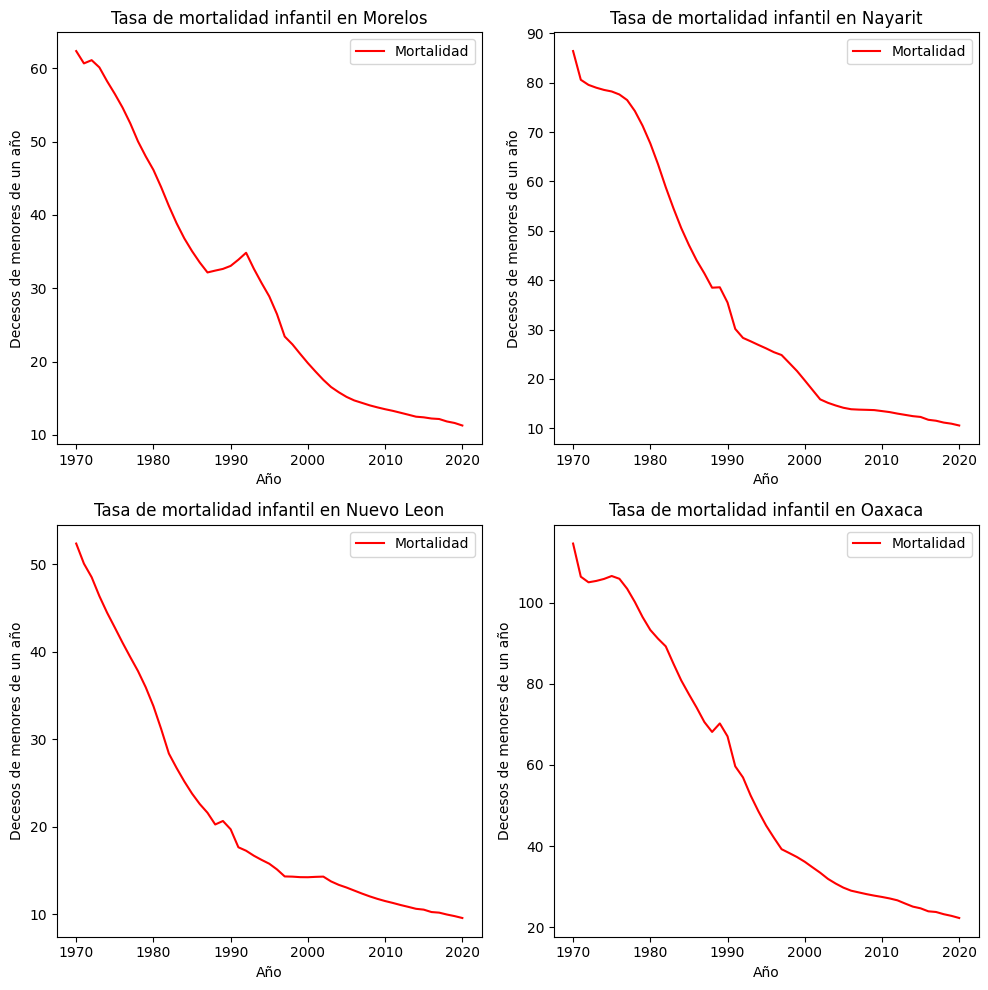

In [ ]:
# Filtrar los datos de cada estado
df_morelos_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 17]
df_nayarit_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 18]
df_nuevo_leon_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 19]
df_oaxaca_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 20]

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Agregar los datos de Morelos al primer subplot
axs[0,0].plot(df_morelos_definf['año'], df_morelos_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[0,0].set_xlabel('Año')
axs[0,0].set_ylabel('Decesos de menores de un año')
axs[0,0].set_title('Tasa de mortalidad infantil en Morelos')
axs[0,0].legend()

# Agregar los datos de Nayarit al segundo subplot
axs[0,1].plot(df_nayarit_definf['año'], df_nayarit_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[0,1].set_xlabel('Año')
axs[0,1].set_ylabel('Decesos de menores de un año')
axs[0,1].set_title('Tasa de mortalidad infantil en Nayarit')
axs[0,1].legend()

# Agregar los datos de Nuevo Leon al tercer subplot
axs[1,0].plot(df_nuevo_leon_definf['año'], df_nuevo_leon_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[1,0].set_xlabel('Año')
axs[1,0].set_ylabel('Decesos de menores de un año')
axs[1,0].set_title('Tasa de mortalidad infantil en Nuevo Leon')
axs[1,0].legend()

# Agregar los datos de Oaxaca al cuarto subplot
axs[1,1].plot(df_oaxaca_definf['año'], df_oaxaca_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[1,1].set_xlabel('Año')
axs[1,1].set_ylabel('Decesos de menores de un año')
axs[1,1].set_title('Tasa de mortalidad infantil en Oaxaca')
axs[1,1].legend()

# Ajustar los espacios entre los subplots
fig.tight_layout()

# Mostrar el gráfico
plt.show()

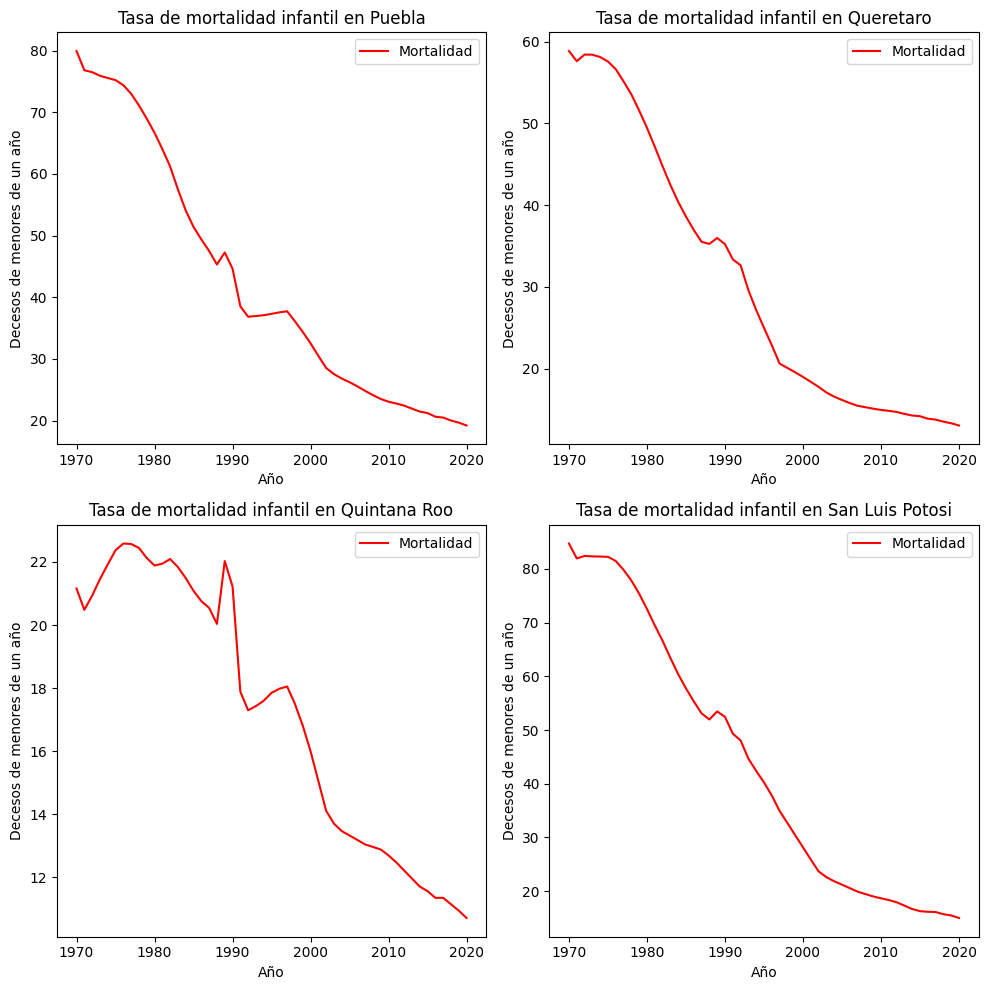

In [ ]:
# Filtrar los datos de cada estado
df_puebla_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 21]
df_queretaro_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 22]
df_quintana_roo_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 23]
df_sluis_potosi_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 24]

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Agregar los datos de Puebla al primer subplot
axs[0,0].plot(df_puebla_definf['año'], df_puebla_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[0,0].set_xlabel('Año')
axs[0,0].set_ylabel('Decesos de menores de un año')
axs[0,0].set_title('Tasa de mortalidad infantil en Puebla')
axs[0,0].legend()

# Agregar los datos de Queretaro al segundo subplot
axs[0,1].plot(df_queretaro_definf['año'], df_queretaro_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[0,1].set_xlabel('Año')
axs[0,1].set_ylabel('Decesos de menores de un año')
axs[0,1].set_title('Tasa de mortalidad infantil en Queretaro')
axs[0,1].legend()

# Agregar los datos de Quintana Roo al tercer subplot
axs[1,0].plot(df_quintana_roo_definf['año'], df_quintana_roo_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[1,0].set_xlabel('Año')
axs[1,0].set_ylabel('Decesos de menores de un año')
axs[1,0].set_title('Tasa de mortalidad infantil en Quintana Roo')
axs[1,0].legend()

# Agregar los datos de San Luis Potosi al cuarto subplot
axs[1,1].plot(df_sluis_potosi_definf['año'], df_sluis_potosi_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[1,1].set_xlabel('Año')
axs[1,1].set_ylabel('Decesos de menores de un año')
axs[1,1].set_title('Tasa de mortalidad infantil en San Luis Potosi')
axs[1,1].legend()

# Ajustar los espacios entre los subplots
fig.tight_layout()

# Mostrar el gráfico
plt.show()

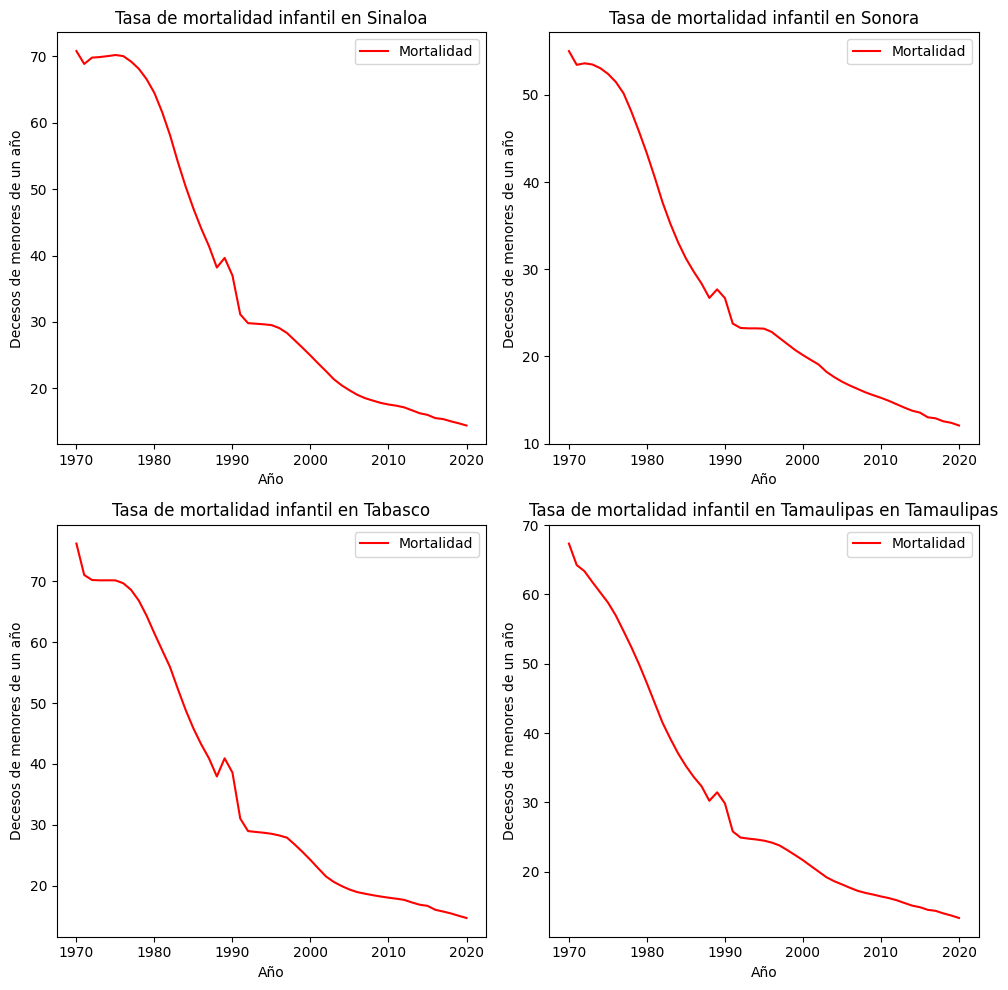

In [ ]:
# Filtrar los datos de cada estado
df_sinaloa_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 25]
df_sonora_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 26]
df_tabasco_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 27]
df_tamaulipas_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 28]

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Agregar los datos de Sinaloa al primer subplot
axs[0,0].plot(df_sinaloa_definf['año'], df_sinaloa_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[0,0].set_xlabel('Año')
axs[0,0].set_ylabel('Decesos de menores de un año')
axs[0,0].set_title('Tasa de mortalidad infantil en Sinaloa')
axs[0,0].legend()

# Agregar los datos de Sonora al segundo subplot
axs[0,1].plot(df_sonora_definf['año'], df_sonora_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[0,1].set_xlabel('Año')
axs[0,1].set_ylabel('Decesos de menores de un año')
axs[0,1].set_title('Tasa de mortalidad infantil en Sonora')
axs[0,1].legend()

# Agregar los datos de Tabasco al tercer subplot
axs[1,0].plot(df_tabasco_definf['año'], df_tabasco_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[1,0].set_xlabel('Año')
axs[1,0].set_ylabel('Decesos de menores de un año')
axs[1,0].set_title('Tasa de mortalidad infantil en Tabasco')
axs[1,0].legend()

# Agregar los datos de Tamaulipas al cuarto subplot
axs[1,1].plot(df_tamaulipas_definf['año'], df_tamaulipas_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[1,1].set_xlabel('Año')
axs[1,1].set_ylabel('Decesos de menores de un año')
axs[1,1].set_title('Tasa de mortalidad infantil en Tamaulipas en Tamaulipas')
axs[1,1].legend()

# Ajustar los espacios entre los subplots
fig.tight_layout()

# Mostrar el gráfico
plt.show()

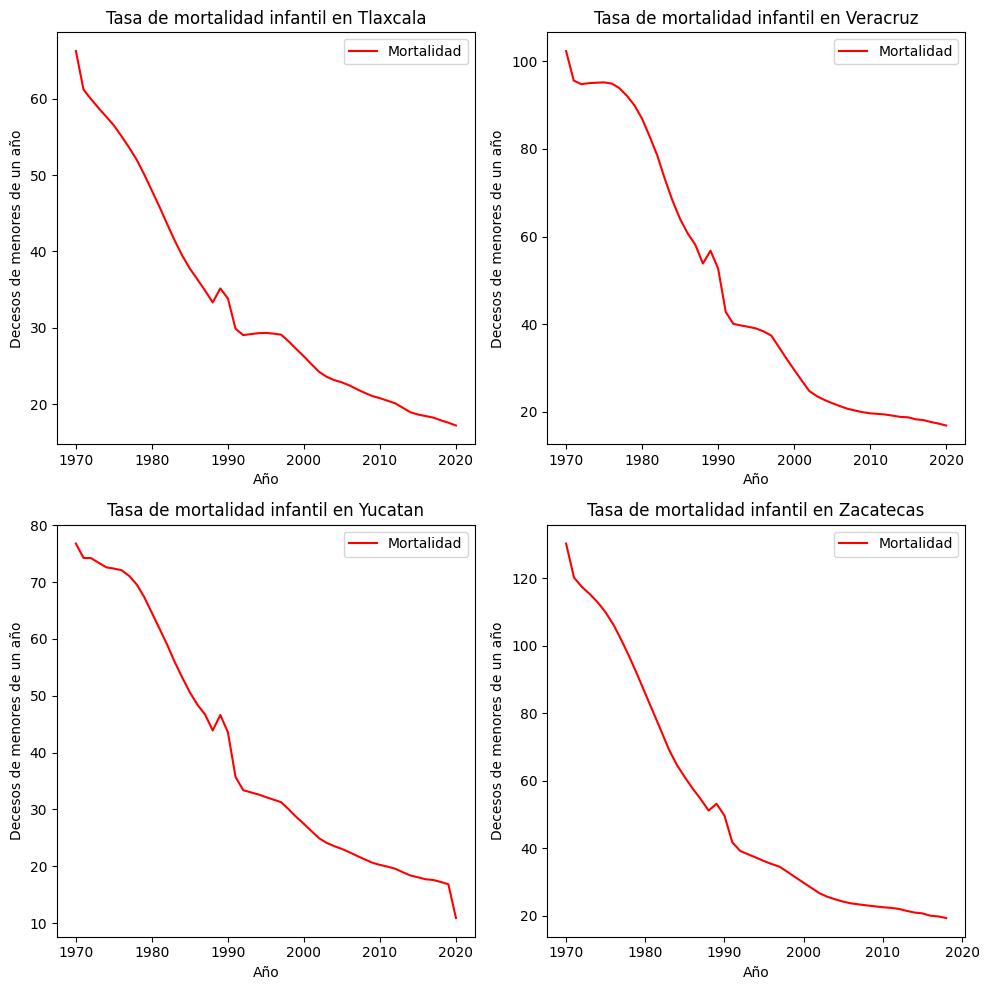

In [ ]:
# Filtrar los datos de cada estado
df_tlaxcala_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 29]
df_veracruz_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 30]
df_yucatan_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 31]
df_zacatecas_definf = dfDefuncionesInf.loc[dfDefuncionesInf['entidad federativa'] == 32]

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Agregar los datos de Tlaxcala al primer subplot
axs[0,0].plot(df_tlaxcala_definf['año'], df_tlaxcala_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[0,0].set_xlabel('Año')
axs[0,0].set_ylabel('Decesos de menores de un año')
axs[0,0].set_title('Tasa de mortalidad infantil en Tlaxcala')
axs[0,0].legend()

# Agregar los datos de Veracruz al segundo subplot
axs[0,1].plot(df_veracruz_definf['año'], df_veracruz_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[0,1].set_xlabel('Año')
axs[0,1].set_ylabel('Decesos de menores de un año')
axs[0,1].set_title('Tasa de mortalidad infantil en Veracruz')
axs[0,1].legend()

# Agregar los datos de Yucatan al tercer subplot
axs[1,0].plot(df_yucatan_definf['año'], df_yucatan_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[1,0].set_xlabel('Año')
axs[1,0].set_ylabel('Decesos de menores de un año')
axs[1,0].set_title('Tasa de mortalidad infantil en Yucatan')
axs[1,0].legend()

# Agregar los datos de Zacatecas al cuarto subplot
axs[1,1].plot(df_zacatecas_definf['año'], df_zacatecas_definf['tasa de mortalidad infantil'], color='red', label='Mortalidad')
axs[1,1].set_xlabel('Año')
axs[1,1].set_ylabel('Decesos de menores de un año')
axs[1,1].set_title('Tasa de mortalidad infantil en Zacatecas')
axs[1,1].legend()

# Ajustar los espacios entre los subplots
fig.tight_layout()

# Mostrar el gráfico
plt.show()

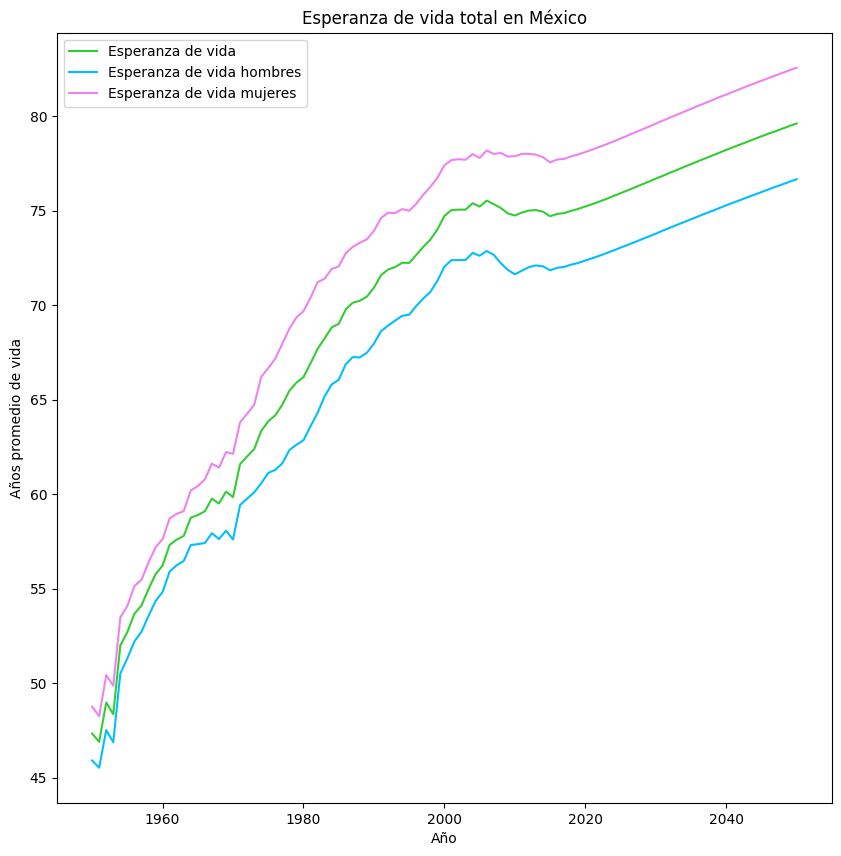

In [ ]:
df_mex_EV = dfE.loc[dfE['CVE_GEO'] == 0]
df_mex_EVH = dfES.loc[(dfES['CVE_GEO'] == 0) & (dfES['SEXO'] == 'Hombre')]
df_mex_EVM = dfES.loc[(dfES['CVE_GEO'] == 0) & (dfES['SEXO'] == 'Mujer')]

plt.figure(figsize=(10,10))
plt.plot(df_mex_EV['AÑO'], df_mex_EV['EV'], color='limegreen', label='Esperanza de vida')
plt.plot(df_mex_EVH['AÑO'], df_mex_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
plt.plot(df_mex_EVM['AÑO'], df_mex_EVM['EV'], color='violet', label='Esperanza de vida mujeres')
plt.xlabel('Año')
plt.ylabel('Años promedio de vida')
plt.title('Esperanza de vida total en México')
plt.legend()

plt.show()

In [ ]:
df_hombres = dfES[dfES["SEXO"] == "Mujer"]  # Filtrar solo los datos de hombres
df_antes_2020 = df_hombres[(df_hombres["AÑO"] <= 2020) & (df_hombres["AÑO"] >= 2000)]  # Filtrar datos antes de 2020
df_max_EV = df_antes_2020.loc[df_antes_2020["EV"].idxmax()]  # Obtener el renglón con la EV más alta
cve_geo_max_EV = df_max_EV["CVE_GEO"]  # Obtener la Cve_geo correspondiente a ese renglón

cve_geo_max_EV
df_max_EV

RENGLON                1630
AÑO                    2020
ENTIDAD    Ciudad de México
CVE_GEO                   9
SEXO                  Mujer
EV                    79.48
Name: 1629, dtype: object

In [ ]:
df_hombres = dfES[dfES["SEXO"] == "Mujer"]  # Filtrar solo los datos de hombres
df_antes_2020 = df_hombres[(df_hombres["AÑO"] <= 2020) & (df_hombres["AÑO"] >= 2000)]  # Filtrar datos antes de 2020
df_min_EV = df_antes_2020.loc[df_antes_2020["EV"].idxmin()]  # Obtener el renglón con la EV más alta
cve_geo_min_EV = df_min_EV["CVE_GEO"]  # Obtener la Cve_geo correspondiente a ese renglón

cve_geo_min_EV
df_min_EV

RENGLON        2096
AÑO            2000
ENTIDAD    Guerrero
CVE_GEO          12
SEXO          Mujer
EV            75.58
Name: 2095, dtype: object

In [ ]:
df_ev = dfE
df_antes_2020 = df_ev[df_ev["AÑO"] == 2050]  # Filtrar datos antes de 2020
df_min_EV = df_antes_2020.loc[df_antes_2020["EV"].idxmin()]  # Obtener el renglón con la EV más alta
cve_geo_min_EV = df_min_EV["CVE_GEO"]  # Obtener la Cve_geo correspondiente a ese renglón

cve_geo_min_EV
df_min_EV

RENGLON        1073
AÑO            2050
ENTIDAD    Guerrero
CVE_GEO          12
EV            78.62
Name: 1072, dtype: object

In [ ]:
df_ev = dfE
df_antes_2020 = df_ev[(df_ev["AÑO"] >= 2020) & (df_ev["AÑO"] <= 2050)]  # Filtrar datos antes de 2020
df_max_EV = df_antes_2020.loc[df_antes_2020["EV"].idxmax()]  # Obtener el renglón con la EV más alta
cve_geo_max_EV = df_max_EV["CVE_GEO"]  # Obtener la Cve_geo correspondiente a ese renglón

cve_geo_max_EV
df_max_EV

RENGLON                 830
AÑO                    2050
ENTIDAD    Ciudad de México
CVE_GEO                   9
EV                    80.33
Name: 829, dtype: object

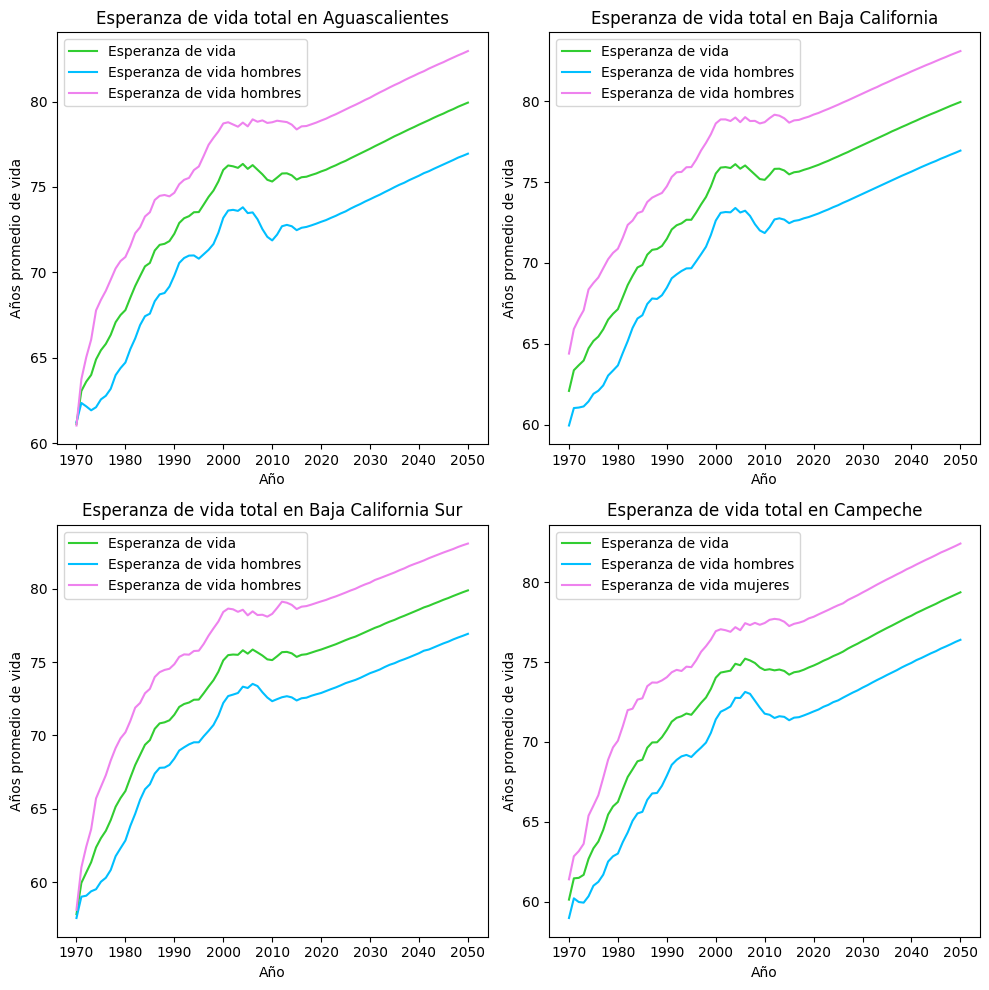

In [ ]:
# Filtrar los datos de cada estado
df_ags_EV = dfE.loc[dfE['CVE_GEO'] == 1]
df_ags_EVH = dfES.loc[(dfES['CVE_GEO'] == 1) & (dfES['SEXO'] == 'Hombre')]
df_ags_EVM = dfES.loc[(dfES['CVE_GEO'] == 1) & (dfES['SEXO'] == 'Mujer')]
df_bc_EV = dfE.loc[dfE['CVE_GEO'] == 2]
df_bc_EVH = dfES.loc[(dfES['CVE_GEO'] == 2) & (dfES['SEXO'] == 'Hombre')]
df_bc_EVM = dfES.loc[(dfES['CVE_GEO'] == 2) & (dfES['SEXO'] == 'Mujer')]
df_bcs_EV = dfE.loc[dfE['CVE_GEO'] == 3]
df_bcs_EVH = dfES.loc[(dfES['CVE_GEO'] == 3) & (dfES['SEXO'] == 'Hombre')]
df_bcs_EVM = dfES.loc[(dfES['CVE_GEO'] == 3) & (dfES['SEXO'] == 'Mujer')]
df_campeche_EV = dfE.loc[dfE['CVE_GEO'] == 4]
df_campeche_EVH = dfES.loc[(dfES['CVE_GEO'] == 4) & (dfES['SEXO'] == 'Hombre')]
df_campeche_EVM = dfES.loc[(dfES['CVE_GEO'] == 4) & (dfES['SEXO'] == 'Mujer')]

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Agregar los datos de Aguascalientes al primer subplot
axs[0,0].plot(df_ags_EV['AÑO'], df_ags_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[0,0].plot(df_ags_EVH['AÑO'], df_ags_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[0,0].plot(df_ags_EVM['AÑO'], df_ags_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[0,0].set_xlabel('Año')
axs[0,0].set_ylabel('Años promedio de vida')
axs[0,0].set_title('Esperanza de vida total en Aguascalientes')
axs[0,0].legend()

# Agregar los datos de Baja California al segundo subplot
axs[0,1].plot(df_bc_EV['AÑO'], df_bc_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[0,1].plot(df_bc_EVH['AÑO'], df_bc_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[0,1].plot(df_bc_EVM['AÑO'], df_bc_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[0,1].set_xlabel('Año')
axs[0,1].set_ylabel('Años promedio de vida')
axs[0,1].set_title('Esperanza de vida total en Baja California')
axs[0,1].legend()

# Agregar los datos de Baja California Sur al tercer subplot
axs[1,0].plot(df_bcs_EV['AÑO'], df_bcs_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[1,0].plot(df_bcs_EVH['AÑO'], df_bcs_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[1,0].plot(df_bcs_EVM['AÑO'], df_bcs_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[1,0].set_xlabel('Año')
axs[1,0].set_ylabel('Años promedio de vida')
axs[1,0].set_title('Esperanza de vida total en Baja California Sur')
axs[1,0].legend()

# Agregar los datos de Campeche al cuarto subplot
axs[1,1].plot(df_campeche_EV['AÑO'], df_campeche_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[1,1].plot(df_campeche_EVH['AÑO'], df_campeche_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[1,1].plot(df_campeche_EVM['AÑO'], df_campeche_EVM['EV'], color='violet', label='Esperanza de vida mujeres')
axs[1,1].set_xlabel('Año')
axs[1,1].set_ylabel('Años promedio de vida')
axs[1,1].set_title('Esperanza de vida total en Campeche')
axs[1,1].legend()

# Ajustar los espacios entre los subplots
fig.tight_layout()

# Mostrar el gráfico
plt.show()

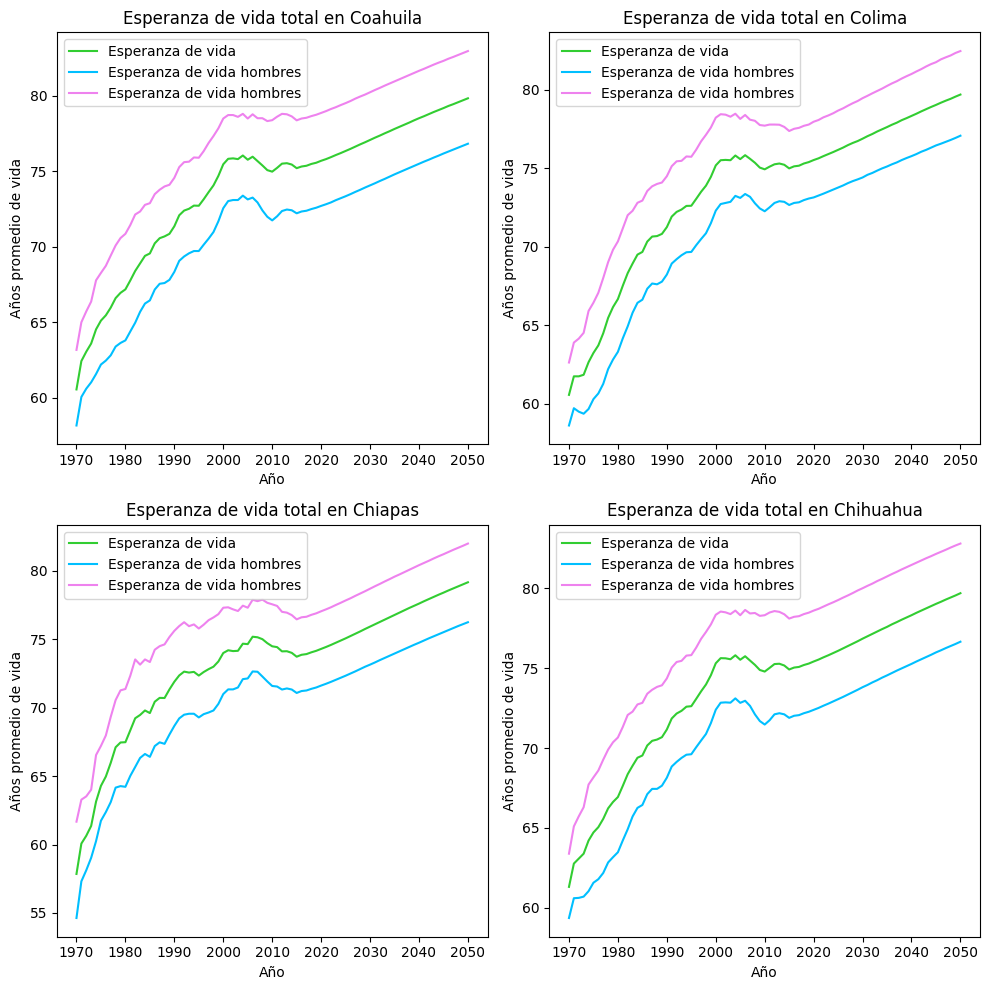

In [ ]:
# Filtrar los datos de cada estado
df_coah_EV = dfE.loc[dfE['CVE_GEO'] == 5]
df_coah_EVH = dfES.loc[(dfES['CVE_GEO'] == 5) & (dfES['SEXO'] == 'Hombre')]
df_coah_EVM = dfES.loc[(dfES['CVE_GEO'] == 5) & (dfES['SEXO'] == 'Mujer')]
df_col_EV = dfE.loc[dfE['CVE_GEO'] == 6]
df_col_EVH = dfES.loc[(dfES['CVE_GEO'] == 6) & (dfES['SEXO'] == 'Hombre')]
df_col_EVM = dfES.loc[(dfES['CVE_GEO'] == 6) & (dfES['SEXO'] == 'Mujer')]
df_chps_EV = dfE.loc[dfE['CVE_GEO'] == 7]
df_chps_EVH = dfES.loc[(dfES['CVE_GEO'] == 7) & (dfES['SEXO'] == 'Hombre')]
df_chps_EVM = dfES.loc[(dfES['CVE_GEO'] == 7) & (dfES['SEXO'] == 'Mujer')]
df_chhh_EV = dfE.loc[dfE['CVE_GEO'] == 8]
df_chhh_EVH = dfES.loc[(dfES['CVE_GEO'] == 8) & (dfES['SEXO'] == 'Hombre')]
df_chhh_EVM = dfES.loc[(dfES['CVE_GEO'] == 8) & (dfES['SEXO'] == 'Mujer')]

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Agregar los datos de Coahuila al primer subplot
axs[0,0].plot(df_coah_EV['AÑO'], df_coah_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[0,0].plot(df_coah_EVH['AÑO'], df_coah_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[0,0].plot(df_coah_EVM['AÑO'], df_coah_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[0,0].set_xlabel('Año')
axs[0,0].set_ylabel('Años promedio de vida')
axs[0,0].set_title('Esperanza de vida total en Coahuila')
axs[0,0].legend()

# Agregar los datos de Colima al segundo subplot
axs[0,1].plot(df_col_EV['AÑO'], df_col_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[0,1].plot(df_col_EVH['AÑO'], df_col_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[0,1].plot(df_col_EVM['AÑO'], df_col_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[0,1].set_xlabel('Año')
axs[0,1].set_ylabel('Años promedio de vida')
axs[0,1].set_title('Esperanza de vida total en Colima')
axs[0,1].legend()

# Agregar los datos de Chiapas al tercer subplot
axs[1,0].plot(df_chps_EV['AÑO'], df_chps_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[1,0].plot(df_chps_EVH['AÑO'], df_chps_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[1,0].plot(df_chps_EVM['AÑO'], df_chps_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[1,0].set_xlabel('Año')
axs[1,0].set_ylabel('Años promedio de vida')
axs[1,0].set_title('Esperanza de vida total en Chiapas')
axs[1,0].legend()

# Agregar los datos de Chihuahua al cuarto subplot
axs[1,1].plot(df_chhh_EV['AÑO'], df_chhh_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[1,1].plot(df_chhh_EVH['AÑO'], df_chhh_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[1,1].plot(df_chhh_EVM['AÑO'], df_chhh_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[1,1].set_xlabel('Año')
axs[1,1].set_ylabel('Años promedio de vida')
axs[1,1].set_title('Esperanza de vida total en Chihuahua')
axs[1,1].legend()

# Ajustar los espacios entre los subplots
fig.tight_layout()

# Mostrar el gráfico
plt.show()

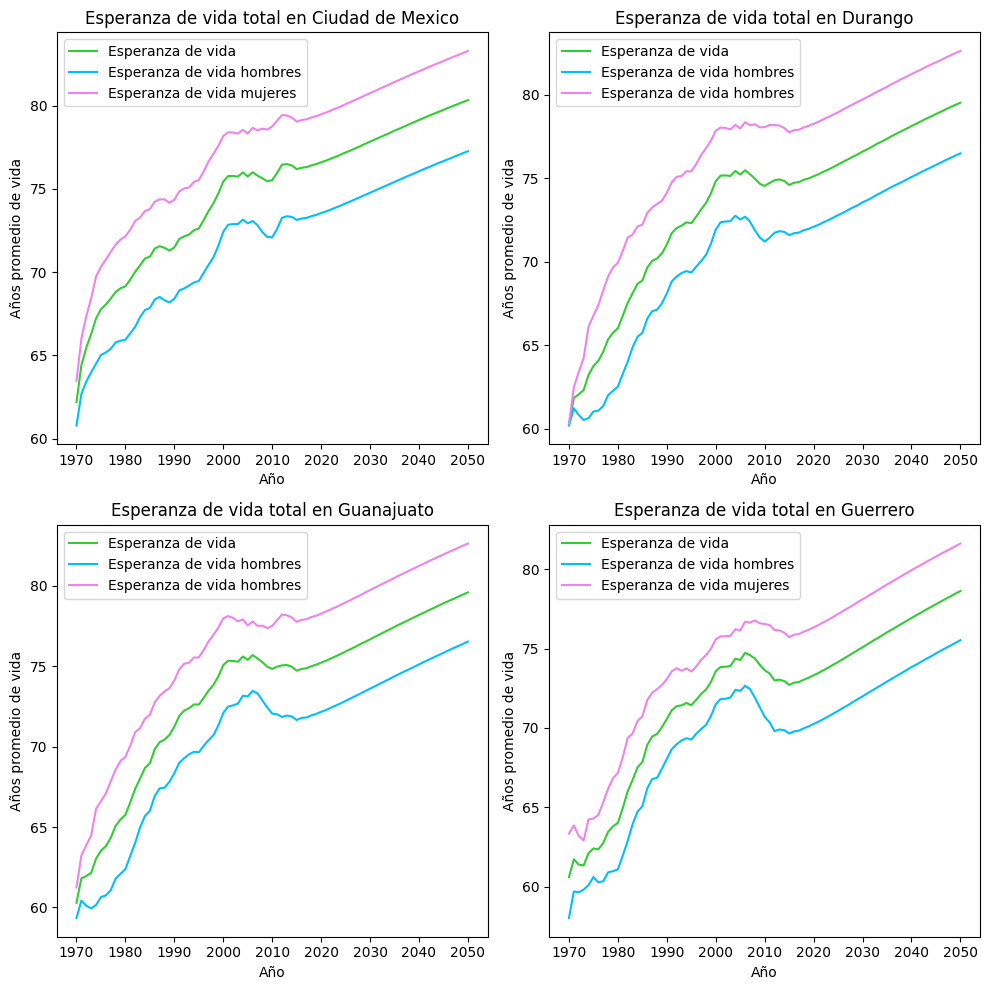

In [ ]:
# Filtrar los datos de cada estado
df_cdmx_EV = dfE.loc[dfE['CVE_GEO'] == 9]
df_cdmx_EVH = dfES.loc[(dfES['CVE_GEO'] == 9) & (dfES['SEXO'] == 'Hombre')]
df_cdmx_EVM = dfES.loc[(dfES['CVE_GEO'] == 9) & (dfES['SEXO'] == 'Mujer')]
df_dur_EV = dfE.loc[dfE['CVE_GEO'] == 10]
df_dur_EVH = dfES.loc[(dfES['CVE_GEO'] == 10) & (dfES['SEXO'] == 'Hombre')]
df_dur_EVM = dfES.loc[(dfES['CVE_GEO'] == 10) & (dfES['SEXO'] == 'Mujer')]
df_gto_EV = dfE.loc[dfE['CVE_GEO'] == 11]
df_gto_EVH = dfES.loc[(dfES['CVE_GEO'] == 11) & (dfES['SEXO'] == 'Hombre')]
df_gto_EVM = dfES.loc[(dfES['CVE_GEO'] == 11) & (dfES['SEXO'] == 'Mujer')]
df_gro_EV = dfE.loc[dfE['CVE_GEO'] == 12]
df_gro_EVH = dfES.loc[(dfES['CVE_GEO'] == 12) & (dfES['SEXO'] == 'Hombre')]
df_gro_EVM = dfES.loc[(dfES['CVE_GEO'] == 12) & (dfES['SEXO'] == 'Mujer')]

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Agregar los datos de Cdmx al primer subplot
axs[0,0].plot(df_cdmx_EV['AÑO'], df_cdmx_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[0,0].plot(df_cdmx_EVH['AÑO'], df_cdmx_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[0,0].plot(df_cdmx_EVM['AÑO'], df_cdmx_EVM['EV'], color='violet', label='Esperanza de vida mujeres')
axs[0,0].set_xlabel('Año')
axs[0,0].set_ylabel('Años promedio de vida')
axs[0,0].set_title('Esperanza de vida total en Ciudad de Mexico')
axs[0,0].legend()

# Agregar los datos de Durango al segundo subplot
axs[0,1].plot(df_dur_EV['AÑO'], df_dur_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[0,1].plot(df_dur_EVH['AÑO'], df_dur_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[0,1].plot(df_dur_EVM['AÑO'], df_dur_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[0,1].set_xlabel('Año')
axs[0,1].set_ylabel('Años promedio de vida')
axs[0,1].set_title('Esperanza de vida total en Durango')
axs[0,1].legend()

# Agregar los datos de Guanajuato al tercer subplot
axs[1,0].plot(df_gto_EV['AÑO'], df_gto_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[1,0].plot(df_gto_EVH['AÑO'], df_gto_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[1,0].plot(df_gto_EVM['AÑO'], df_gto_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[1,0].set_xlabel('Año')
axs[1,0].set_ylabel('Años promedio de vida')
axs[1,0].set_title('Esperanza de vida total en Guanajuato')
axs[1,0].legend()

# Agregar los datos de Guerrero al cuarto subplot
axs[1,1].plot(df_gro_EV['AÑO'], df_gro_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[1,1].plot(df_gro_EVH['AÑO'], df_gro_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[1,1].plot(df_gro_EVM['AÑO'], df_gro_EVM['EV'], color='violet', label='Esperanza de vida mujeres')
axs[1,1].set_xlabel('Año')
axs[1,1].set_ylabel('Años promedio de vida')
axs[1,1].set_title('Esperanza de vida total en Guerrero')
axs[1,1].legend()

# Ajustar los espacios entre los subplots
fig.tight_layout()

# Mostrar el gráfico
plt.show()

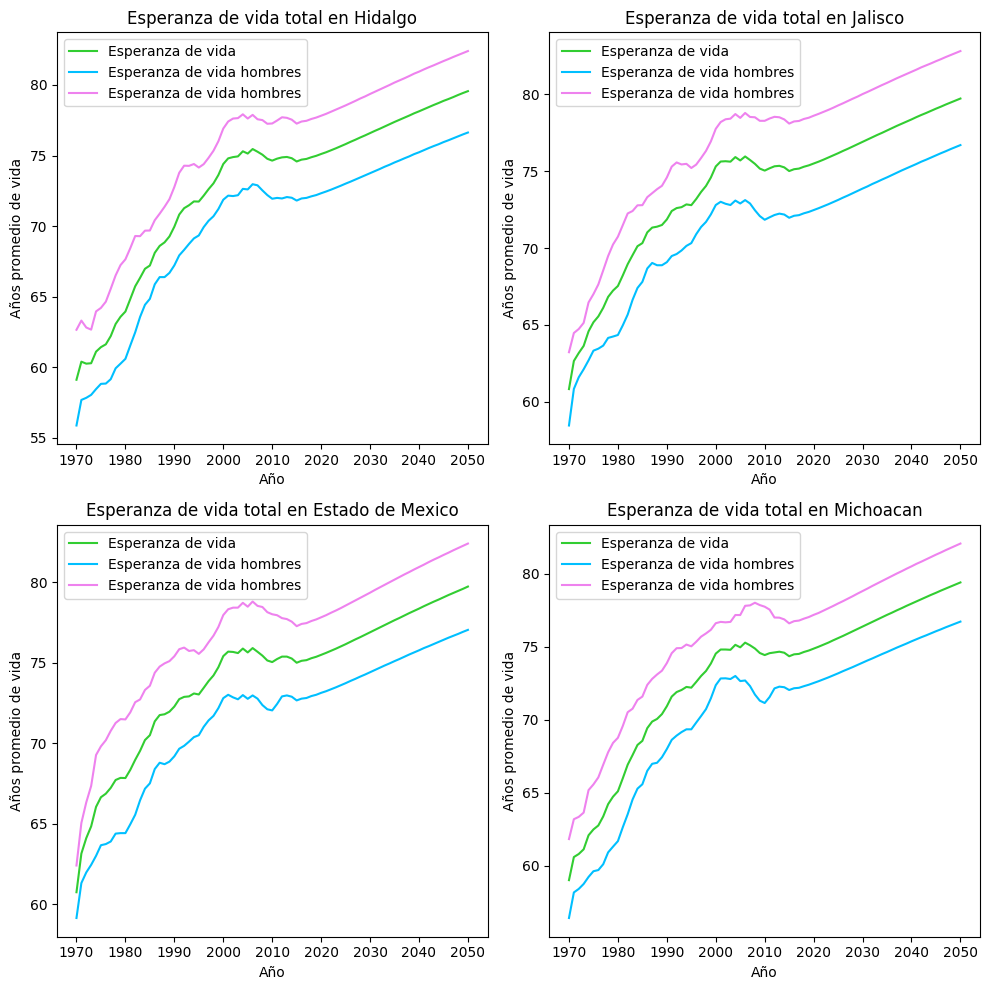

In [ ]:
# Filtrar los datos de cada estado
df_hid_EV = dfE.loc[dfE['CVE_GEO'] == 13]
df_hid_EVH = dfES.loc[(dfES['CVE_GEO'] == 13) & (dfES['SEXO'] == 'Hombre')]
df_hid_EVM = dfES.loc[(dfES['CVE_GEO'] == 13) & (dfES['SEXO'] == 'Mujer')]
df_jal_EV = dfE.loc[dfE['CVE_GEO'] == 14]
df_jal_EVH = dfES.loc[(dfES['CVE_GEO'] == 14) & (dfES['SEXO'] == 'Hombre')]
df_jal_EVM = dfES.loc[(dfES['CVE_GEO'] == 14) & (dfES['SEXO'] == 'Mujer')]
df_edomx_EV = dfE.loc[dfE['CVE_GEO'] == 15]
df_edomx_EVH = dfES.loc[(dfES['CVE_GEO'] == 15) & (dfES['SEXO'] == 'Hombre')]
df_edomx_EVM = dfES.loc[(dfES['CVE_GEO'] == 15) & (dfES['SEXO'] == 'Mujer')]
df_mich_EV = dfE.loc[dfE['CVE_GEO'] == 16]
df_mich_EVH = dfES.loc[(dfES['CVE_GEO'] == 16) & (dfES['SEXO'] == 'Hombre')]
df_mich_EVM = dfES.loc[(dfES['CVE_GEO'] == 16) & (dfES['SEXO'] == 'Mujer')]

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Agregar los datos de Hidalgo al primer subplot
axs[0,0].plot(df_hid_EV['AÑO'], df_hid_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[0,0].plot(df_hid_EVH['AÑO'], df_hid_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[0,0].plot(df_hid_EVM['AÑO'], df_hid_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[0,0].set_xlabel('Año')
axs[0,0].set_ylabel('Años promedio de vida')
axs[0,0].set_title('Esperanza de vida total en Hidalgo')
axs[0,0].legend()

# Agregar los datos de Jalisco al segundo subplot
axs[0,1].plot(df_jal_EV['AÑO'], df_jal_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[0,1].plot(df_jal_EVH['AÑO'], df_jal_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[0,1].plot(df_jal_EVM['AÑO'], df_jal_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[0,1].set_xlabel('Año')
axs[0,1].set_ylabel('Años promedio de vida')
axs[0,1].set_title('Esperanza de vida total en Jalisco')
axs[0,1].legend()

# Agregar los datos de Estado de Mexico al tercer subplot
axs[1,0].plot(df_edomx_EV['AÑO'], df_edomx_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[1,0].plot(df_edomx_EVH['AÑO'], df_edomx_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[1,0].plot(df_edomx_EVM['AÑO'], df_edomx_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[1,0].set_xlabel('Año')
axs[1,0].set_ylabel('Años promedio de vida')
axs[1,0].set_title('Esperanza de vida total en Estado de Mexico')
axs[1,0].legend()

# Agregar los datos de Michoacan al cuarto subplot
axs[1,1].plot(df_mich_EV['AÑO'], df_mich_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[1,1].plot(df_mich_EVH['AÑO'], df_mich_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[1,1].plot(df_mich_EVM['AÑO'], df_mich_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[1,1].set_xlabel('Año')
axs[1,1].set_ylabel('Años promedio de vida')
axs[1,1].set_title('Esperanza de vida total en Michoacan')
axs[1,1].legend()

# Ajustar los espacios entre los subplots
fig.tight_layout()

# Mostrar el gráfico
plt.show()

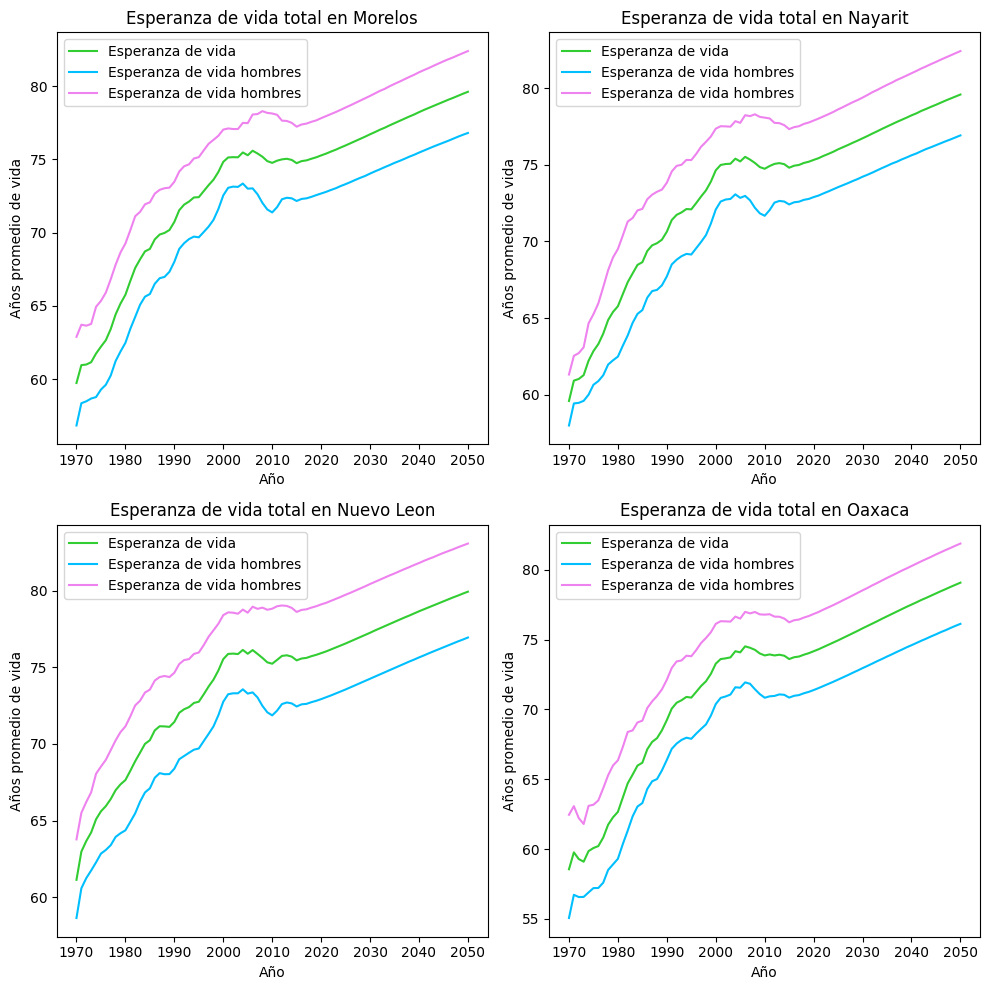

In [ ]:
# Filtrar los datos de cada estado
df_mor_EV = dfE.loc[dfE['CVE_GEO'] == 17]
df_mor_EVH = dfES.loc[(dfES['CVE_GEO'] == 17) & (dfES['SEXO'] == 'Hombre')]
df_mor_EVM = dfES.loc[(dfES['CVE_GEO'] == 17) & (dfES['SEXO'] == 'Mujer')]
df_nay_EV = dfE.loc[dfE['CVE_GEO'] == 18]
df_nay_EVH = dfES.loc[(dfES['CVE_GEO'] == 18) & (dfES['SEXO'] == 'Hombre')]
df_nay_EVM = dfES.loc[(dfES['CVE_GEO'] == 18) & (dfES['SEXO'] == 'Mujer')]
df_nl_EV = dfE.loc[dfE['CVE_GEO'] == 19]
df_nl_EVH = dfES.loc[(dfES['CVE_GEO'] == 19) & (dfES['SEXO'] == 'Hombre')]
df_nl_EVM = dfES.loc[(dfES['CVE_GEO'] == 19) & (dfES['SEXO'] == 'Mujer')]
df_oax_EV = dfE.loc[dfE['CVE_GEO'] == 20]
df_oax_EVH = dfES.loc[(dfES['CVE_GEO'] == 20) & (dfES['SEXO'] == 'Hombre')]
df_oax_EVM = dfES.loc[(dfES['CVE_GEO'] == 20) & (dfES['SEXO'] == 'Mujer')]

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Agregar los datos de Morelos al primer subplot
axs[0,0].plot(df_mor_EV['AÑO'], df_mor_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[0,0].plot(df_mor_EVH['AÑO'], df_mor_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[0,0].plot(df_mor_EVM['AÑO'], df_mor_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[0,0].set_xlabel('Año')
axs[0,0].set_ylabel('Años promedio de vida')
axs[0,0].set_title('Esperanza de vida total en Morelos')
axs[0,0].legend()

# Agregar los datos de Nayarit al segundo subplot
axs[0,1].plot(df_nay_EV['AÑO'], df_nay_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[0,1].plot(df_nay_EVH['AÑO'], df_nay_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[0,1].plot(df_nay_EVM['AÑO'], df_nay_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[0,1].set_xlabel('Año')
axs[0,1].set_ylabel('Años promedio de vida')
axs[0,1].set_title('Esperanza de vida total en Nayarit')
axs[0,1].legend()

# Agregar los datos de Nuevo Leon al tercer subplot
axs[1,0].plot(df_nl_EV['AÑO'], df_nl_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[1,0].plot(df_nl_EVH['AÑO'], df_nl_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[1,0].plot(df_nl_EVM['AÑO'], df_nl_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[1,0].set_xlabel('Año')
axs[1,0].set_ylabel('Años promedio de vida')
axs[1,0].set_title('Esperanza de vida total en Nuevo Leon')
axs[1,0].legend()

# Agregar los datos de Oaxaca al cuarto subplot
axs[1,1].plot(df_oax_EV['AÑO'], df_oax_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[1,1].plot(df_oax_EVH['AÑO'], df_oax_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[1,1].plot(df_oax_EVM['AÑO'], df_oax_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[1,1].set_xlabel('Año')
axs[1,1].set_ylabel('Años promedio de vida')
axs[1,1].set_title('Esperanza de vida total en Oaxaca')
axs[1,1].legend()

# Ajustar los espacios entre los subplots
fig.tight_layout()

# Mostrar el gráfico
plt.show()

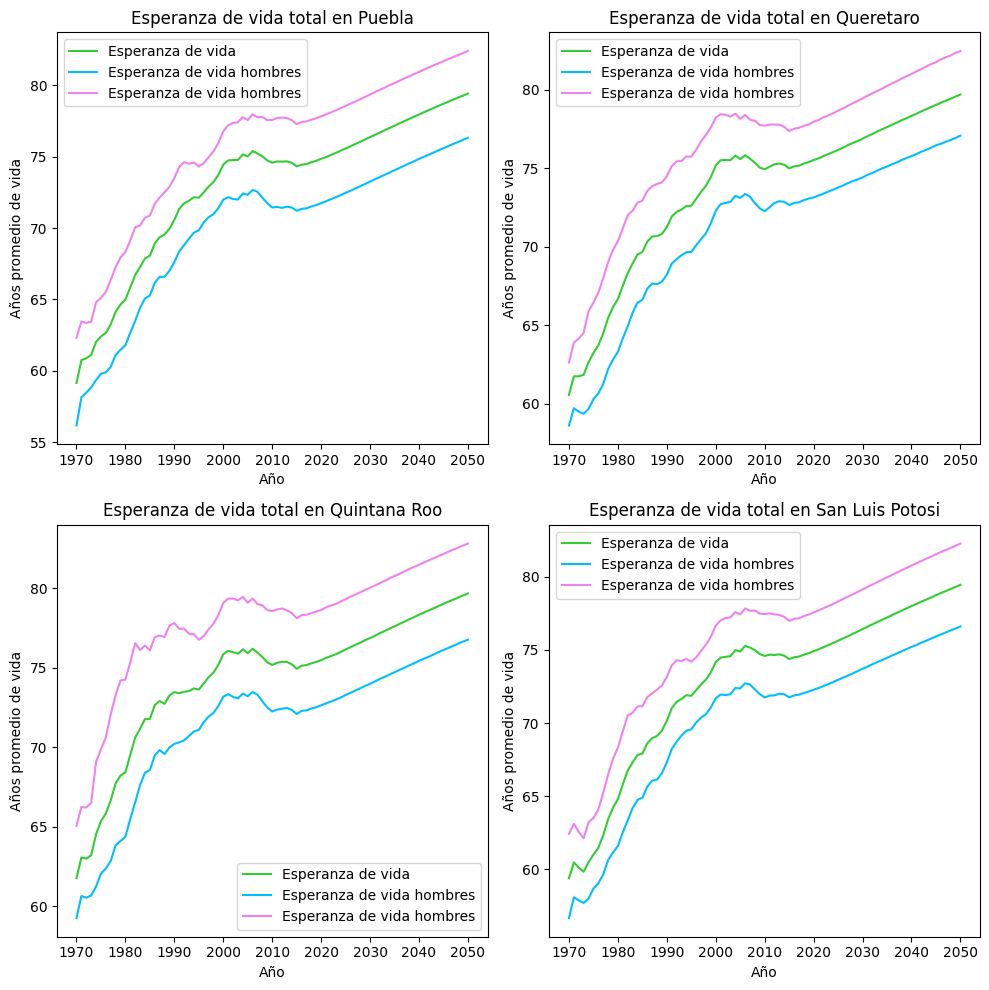

In [ ]:
# Filtrar los datos de cada estado
df_pue_EV = dfE.loc[dfE['CVE_GEO'] == 21]
df_pue_EVH = dfES.loc[(dfES['CVE_GEO'] == 21) & (dfES['SEXO'] == 'Hombre')]
df_pue_EVM = dfES.loc[(dfES['CVE_GEO'] == 21) & (dfES['SEXO'] == 'Mujer')]
df_qro_EV = dfE.loc[dfE['CVE_GEO'] == 22]
df_qro_EVH = dfES.loc[(dfES['CVE_GEO'] == 22) & (dfES['SEXO'] == 'Hombre')]
df_qro_EVM = dfES.loc[(dfES['CVE_GEO'] == 22) & (dfES['SEXO'] == 'Mujer')]
df_qnro_EV = dfE.loc[dfE['CVE_GEO'] == 23]
df_qnro_EVH = dfES.loc[(dfES['CVE_GEO'] == 23) & (dfES['SEXO'] == 'Hombre')]
df_qnro_EVM = dfES.loc[(dfES['CVE_GEO'] == 23) & (dfES['SEXO'] == 'Mujer')]
df_slp_EV = dfE.loc[dfE['CVE_GEO'] == 24]
df_slp_EVH = dfES.loc[(dfES['CVE_GEO'] == 24) & (dfES['SEXO'] == 'Hombre')]
df_slp_EVM = dfES.loc[(dfES['CVE_GEO'] == 24) & (dfES['SEXO'] == 'Mujer')]

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Agregar los datos de Puebla al primer subplot
axs[0,0].plot(df_pue_EV['AÑO'], df_pue_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[0,0].plot(df_pue_EVH['AÑO'], df_pue_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[0,0].plot(df_pue_EVM['AÑO'], df_pue_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[0,0].set_xlabel('Año')
axs[0,0].set_ylabel('Años promedio de vida')
axs[0,0].set_title('Esperanza de vida total en Puebla')
axs[0,0].legend()

# Agregar los datos de Queretaro al segundo subplot
axs[0,1].plot(df_col_EV['AÑO'], df_col_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[0,1].plot(df_col_EVH['AÑO'], df_col_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[0,1].plot(df_col_EVM['AÑO'], df_col_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[0,1].set_xlabel('Año')
axs[0,1].set_ylabel('Años promedio de vida')
axs[0,1].set_title('Esperanza de vida total en Queretaro')
axs[0,1].legend()

# Agregar los datos de Quintana Roo al tercer subplot
axs[1,0].plot(df_qnro_EV['AÑO'], df_qnro_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[1,0].plot(df_qnro_EVH['AÑO'], df_qnro_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[1,0].plot(df_qnro_EVM['AÑO'], df_qnro_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[1,0].set_xlabel('Año')
axs[1,0].set_ylabel('Años promedio de vida')
axs[1,0].set_title('Esperanza de vida total en Quintana Roo')
axs[1,0].legend()

# Agregar los datos de San Luis Potosi al cuarto subplot
axs[1,1].plot(df_slp_EV['AÑO'], df_slp_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[1,1].plot(df_slp_EVH['AÑO'], df_slp_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[1,1].plot(df_slp_EVM['AÑO'], df_slp_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[1,1].set_xlabel('Año')
axs[1,1].set_ylabel('Años promedio de vida')
axs[1,1].set_title('Esperanza de vida total en San Luis Potosi')
axs[1,1].legend()

# Ajustar los espacios entre los subplots
fig.tight_layout()

# Mostrar el gráfico
plt.show()

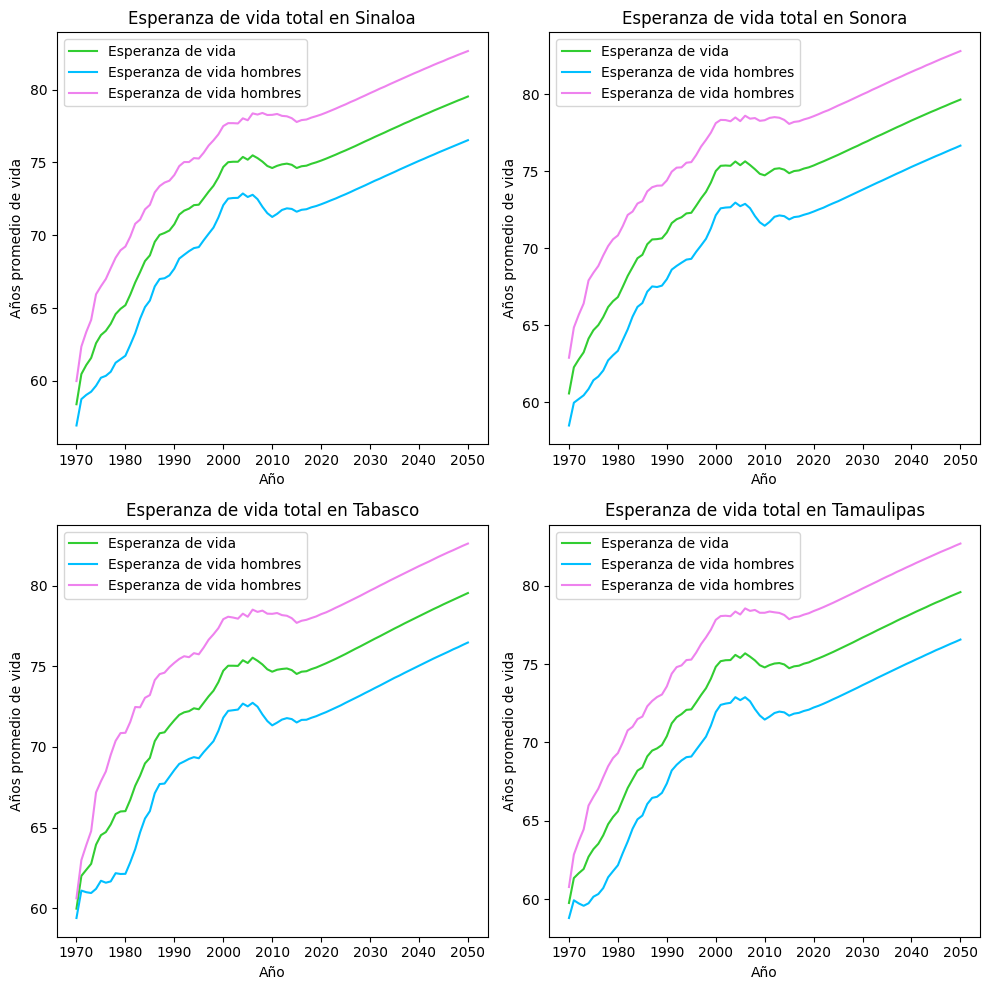

In [ ]:
# Filtrar los datos de cada estado
df_snl_EV = dfE.loc[dfE['CVE_GEO'] == 25]
df_snl_EVH = dfES.loc[(dfES['CVE_GEO'] == 25) & (dfES['SEXO'] == 'Hombre')]
df_snl_EVM = dfES.loc[(dfES['CVE_GEO'] == 25) & (dfES['SEXO'] == 'Mujer')]
df_son_EV = dfE.loc[dfE['CVE_GEO'] == 26]
df_son_EVH = dfES.loc[(dfES['CVE_GEO'] == 26) & (dfES['SEXO'] == 'Hombre')]
df_son_EVM = dfES.loc[(dfES['CVE_GEO'] == 26) & (dfES['SEXO'] == 'Mujer')]
df_tab_EV = dfE.loc[dfE['CVE_GEO'] == 27]
df_tab_EVH = dfES.loc[(dfES['CVE_GEO'] == 27) & (dfES['SEXO'] == 'Hombre')]
df_tab_EVM = dfES.loc[(dfES['CVE_GEO'] == 27) & (dfES['SEXO'] == 'Mujer')]
df_tam_EV = dfE.loc[dfE['CVE_GEO'] == 28]
df_tam_EVH = dfES.loc[(dfES['CVE_GEO'] == 28) & (dfES['SEXO'] == 'Hombre')]
df_tam_EVM = dfES.loc[(dfES['CVE_GEO'] == 28) & (dfES['SEXO'] == 'Mujer')]

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Agregar los datos de Sinaloa al primer subplot
axs[0,0].plot(df_snl_EV['AÑO'], df_snl_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[0,0].plot(df_snl_EVH['AÑO'], df_snl_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[0,0].plot(df_snl_EVM['AÑO'], df_snl_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[0,0].set_xlabel('Año')
axs[0,0].set_ylabel('Años promedio de vida')
axs[0,0].set_title('Esperanza de vida total en Sinaloa')
axs[0,0].legend()

# Agregar los datos de Sonora al segundo subplot
axs[0,1].plot(df_son_EV['AÑO'], df_son_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[0,1].plot(df_son_EVH['AÑO'], df_son_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[0,1].plot(df_son_EVM['AÑO'], df_son_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[0,1].set_xlabel('Año')
axs[0,1].set_ylabel('Años promedio de vida')
axs[0,1].set_title('Esperanza de vida total en Sonora')
axs[0,1].legend()

# Agregar los datos de Tabasco al tercer subplot
axs[1,0].plot(df_tab_EV['AÑO'], df_tab_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[1,0].plot(df_tab_EVH['AÑO'], df_tab_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[1,0].plot(df_tab_EVM['AÑO'], df_tab_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[1,0].set_xlabel('Año')
axs[1,0].set_ylabel('Años promedio de vida')
axs[1,0].set_title('Esperanza de vida total en Tabasco')
axs[1,0].legend()

# Agregar los datos de Tamaulipas al cuarto subplot
axs[1,1].plot(df_tam_EV['AÑO'], df_tam_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[1,1].plot(df_tam_EVH['AÑO'], df_tam_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[1,1].plot(df_tam_EVM['AÑO'], df_tam_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[1,1].set_xlabel('Año')
axs[1,1].set_ylabel('Años promedio de vida')
axs[1,1].set_title('Esperanza de vida total en Tamaulipas')
axs[1,1].legend()

# Ajustar los espacios entre los subplots
fig.tight_layout()

# Mostrar el gráfico
plt.show()

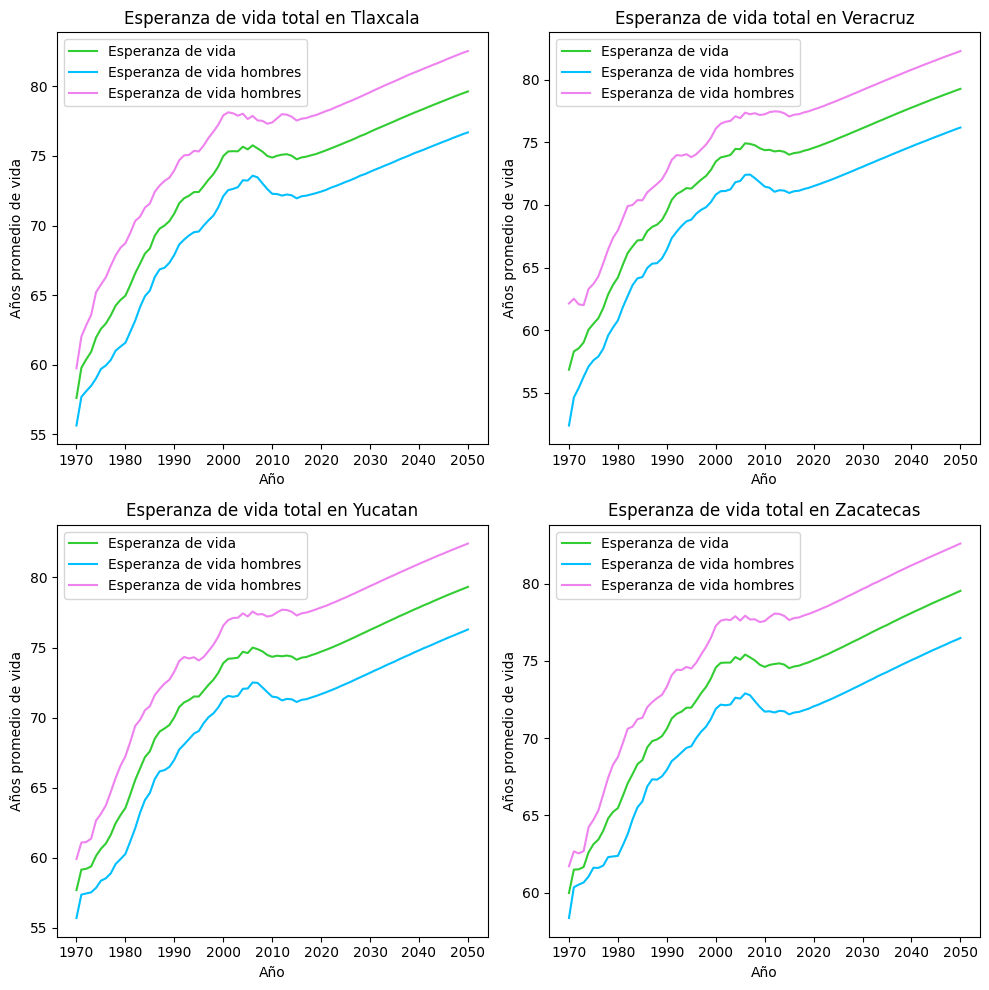

In [ ]:
# Filtrar los datos de cada estado
df_tlax_EV = dfE.loc[dfE['CVE_GEO'] == 29]
df_tlax_EVH = dfES.loc[(dfES['CVE_GEO'] == 29) & (dfES['SEXO'] == 'Hombre')]
df_tlax_EVM = dfES.loc[(dfES['CVE_GEO'] == 29) & (dfES['SEXO'] == 'Mujer')]
df_ver_EV = dfE.loc[dfE['CVE_GEO'] == 30]
df_ver_EVH = dfES.loc[(dfES['CVE_GEO'] == 30) & (dfES['SEXO'] == 'Hombre')]
df_ver_EVM = dfES.loc[(dfES['CVE_GEO'] == 30) & (dfES['SEXO'] == 'Mujer')]
df_yuc_EV = dfE.loc[dfE['CVE_GEO'] == 31]
df_yuc_EVH = dfES.loc[(dfES['CVE_GEO'] == 31) & (dfES['SEXO'] == 'Hombre')]
df_yuc_EVM = dfES.loc[(dfES['CVE_GEO'] == 31) & (dfES['SEXO'] == 'Mujer')]
df_zac_EV = dfE.loc[dfE['CVE_GEO'] == 32]
df_zac_EVH = dfES.loc[(dfES['CVE_GEO'] == 32) & (dfES['SEXO'] == 'Hombre')]
df_zac_EVM = dfES.loc[(dfES['CVE_GEO'] == 32) & (dfES['SEXO'] == 'Mujer')]

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Agregar los datos de Tlaxcala al primer subplot
axs[0,0].plot(df_tlax_EV['AÑO'], df_tlax_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[0,0].plot(df_tlax_EVH['AÑO'], df_tlax_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[0,0].plot(df_tlax_EVM['AÑO'], df_tlax_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[0,0].set_xlabel('Año')
axs[0,0].set_ylabel('Años promedio de vida')
axs[0,0].set_title('Esperanza de vida total en Tlaxcala')
axs[0,0].legend()

# Agregar los datos de Veracruz al segundo subplot
axs[0,1].plot(df_ver_EV['AÑO'], df_ver_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[0,1].plot(df_ver_EVH['AÑO'], df_ver_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[0,1].plot(df_ver_EVM['AÑO'], df_ver_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[0,1].set_xlabel('Año')
axs[0,1].set_ylabel('Años promedio de vida')
axs[0,1].set_title('Esperanza de vida total en Veracruz')
axs[0,1].legend()

# Agregar los datos de Yucatan al tercer subplot
axs[1,0].plot(df_yuc_EV['AÑO'], df_yuc_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[1,0].plot(df_yuc_EVH['AÑO'], df_yuc_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[1,0].plot(df_yuc_EVM['AÑO'], df_yuc_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[1,0].set_xlabel('Año')
axs[1,0].set_ylabel('Años promedio de vida')
axs[1,0].set_title('Esperanza de vida total en Yucatan')
axs[1,0].legend()

# Agregar los datos de Zacatecas al cuarto subplot
axs[1,1].plot(df_zac_EV['AÑO'], df_zac_EV['EV'], color='limegreen', label='Esperanza de vida')
axs[1,1].plot(df_zac_EVH['AÑO'], df_zac_EVH['EV'], color='deepskyblue', label='Esperanza de vida hombres')
axs[1,1].plot(df_zac_EVM['AÑO'], df_zac_EVM['EV'], color='violet', label='Esperanza de vida hombres')
axs[1,1].set_xlabel('Año')
axs[1,1].set_ylabel('Años promedio de vida')
axs[1,1].set_title('Esperanza de vida total en Zacatecas')
axs[1,1].legend()

# Ajustar los espacios entre los subplots
fig.tight_layout()

# Mostrar el gráfico
plt.show()

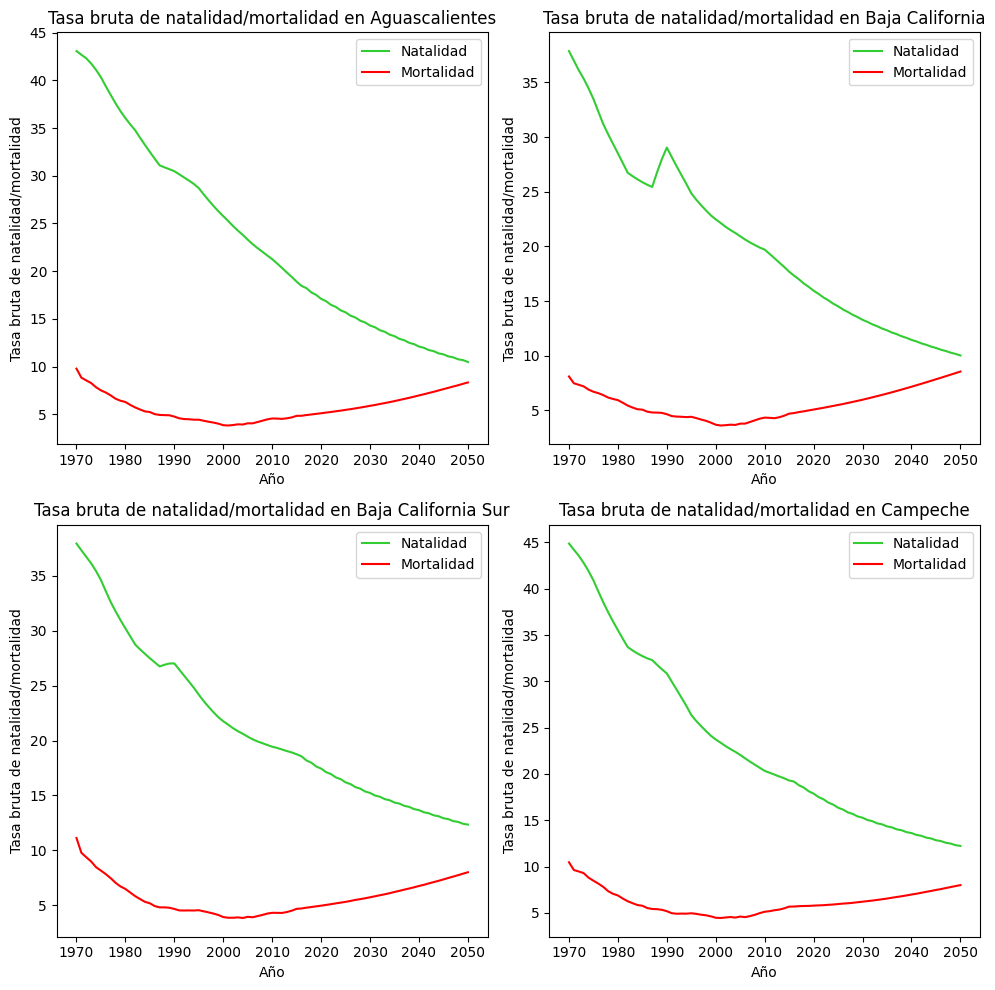

In [ ]:
# Filtrar los datos de cada estado
df_aguascalientes_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 1]
df_aguascalientes_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 1]
df_baja_cal_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 2]
df_baja_cal_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 2]
df_baja_cal_sur_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 3]
df_baja_cal_sur_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 3]
df_campeche_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 4]
df_campeche_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 4]

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Agregar los datos de Aguascalientes al primer subplot
axs[0,0].plot(df_aguascalientes_nat['año'], df_aguascalientes_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[0,0].plot(df_aguascalientes_def['año'], df_aguascalientes_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[0,0].set_xlabel('Año')
axs[0,0].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[0,0].set_title('Tasa bruta de natalidad/mortalidad en Aguascalientes')
axs[0,0].legend()

# Agregar los datos de Baja California al segundo subplot
axs[0,1].plot(df_baja_cal_nat['año'], df_baja_cal_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[0,1].plot(df_baja_cal_def['año'], df_baja_cal_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[0,1].set_xlabel('Año')
axs[0,1].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[0,1].set_title('Tasa bruta de natalidad/mortalidad en Baja California')
axs[0,1].legend()

# Agregar los datos de Baja California Sur al tercer subplot
axs[1,0].plot(df_baja_cal_sur_nat['año'], df_baja_cal_sur_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[1,0].plot(df_baja_cal_sur_def['año'], df_baja_cal_sur_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[1,0].set_xlabel('Año')
axs[1,0].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[1,0].set_title('Tasa bruta de natalidad/mortalidad en Baja California Sur')
axs[1,0].legend()

# Agregar los datos de Campeche al cuarto subplot
axs[1,1].plot(df_campeche_nat['año'], df_campeche_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[1,1].plot(df_campeche_def['año'], df_campeche_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[1,1].set_xlabel('Año')
axs[1,1].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[1,1].set_title('Tasa bruta de natalidad/mortalidad en Campeche')
axs[1,1].legend()

# Ajustar los espacios entre los subplots
fig.tight_layout()

# Mostrar el gráfico
plt.show()

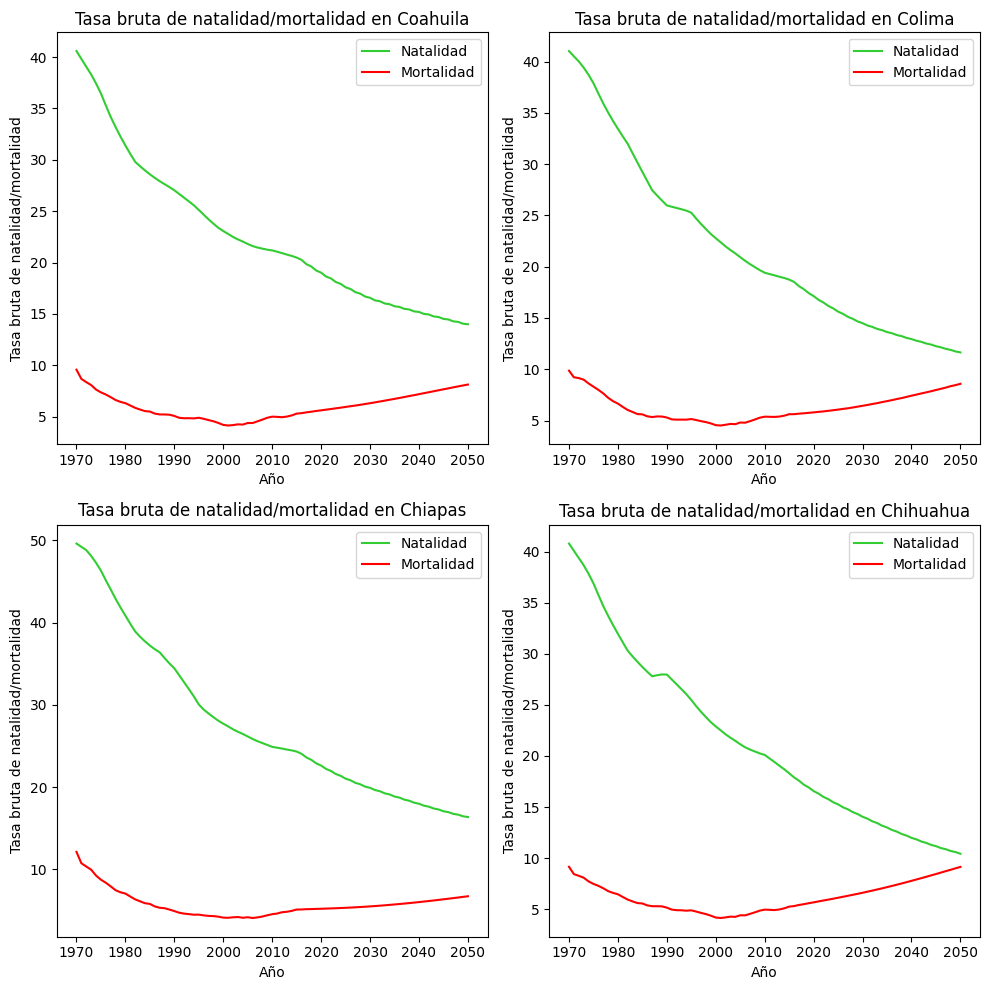

In [ ]:
# Filtrar los datos de cada estado
df_coahuila_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 5]
df_coahuila_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 5]
df_colima_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 6]
df_colima_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 6]
df_chiapas_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 7]
df_chiapas_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 7]
df_chihuahua_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 8]
df_chihuahua_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 8]

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Agregar los datos de Coahuila al primer subplot
axs[0,0].plot(df_coahuila_nat['año'], df_coahuila_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[0,0].plot(df_coahuila_def['año'], df_coahuila_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[0,0].set_xlabel('Año')
axs[0,0].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[0,0].set_title('Tasa bruta de natalidad/mortalidad en Coahuila')
axs[0,0].legend()

# Agregar los datos de Colima al segundo subplot
axs[0,1].plot(df_colima_nat['año'], df_colima_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[0,1].plot(df_colima_def['año'], df_colima_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[0,1].set_xlabel('Año')
axs[0,1].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[0,1].set_title('Tasa bruta de natalidad/mortalidad en Colima')
axs[0,1].legend()

# Agregar los datos de Chiapas al tercer subplot
axs[1,0].plot(df_chiapas_nat['año'], df_chiapas_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[1,0].plot(df_chiapas_def['año'], df_chiapas_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[1,0].set_xlabel('Año')
axs[1,0].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[1,0].set_title('Tasa bruta de natalidad/mortalidad en Chiapas')
axs[1,0].legend()

# Agregar los datos de Chihuahua al cuarto subplot
axs[1,1].plot(df_chihuahua_nat['año'], df_chihuahua_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[1,1].plot(df_chihuahua_def['año'], df_chihuahua_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[1,1].set_xlabel('Año')
axs[1,1].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[1,1].set_title('Tasa bruta de natalidad/mortalidad en Chihuahua')
axs[1,1].legend()

# Ajustar los espacios entre los subplots
fig.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
df_filt = df_chiapas_def[df_chiapas_def['año'] > 2000]

# Encuentra la fila con la tasa de mortalidad más alta
max_row = df_filt.loc[df_filt['tasa bruta de mortalidad'].idxmax()]

# Imprime el año y la tasa de mortalidad más alta
print("El año con la tasa bruta de mortalidad más alta fue:", max_row['año'])
print("La tasa bruta de mortalidad más alta fue:", max_row['tasa bruta de mortalidad'])

df_filt = df_chiapas_nat[df_chiapas_nat['año'] > 2000]

# Encuentra la fila con la tasa de mortalidad más alta
max_row = df_filt.loc[df_filt['tasa bruta de natalidad'].idxmin()]

# Imprime el año y la tasa de mortalidad más alta
print("El año con la tasa bruta de natalidad más baja fue:", max_row['año'])
print("La tasa bruta de natalidad más baja fue:", max_row['tasa bruta de natalidad'])

El año con la tasa bruta de mortalidad más alta fue: 2050.0
La tasa bruta de mortalidad más alta fue: 6.733008865162463
El año con la tasa bruta de natalidad más baja fue: 2050.0
La tasa bruta de natalidad más baja fue: 16.362762478703416


In [ ]:
df_filt = df_coahuila_def[df_coahuila_def['año'] > 2000]

# Encuentra la fila con la tasa de mortalidad más alta
max_row = df_filt.loc[df_filt['tasa bruta de mortalidad'].idxmax()]

# Imprime el año y la tasa de mortalidad más alta
print("El año con la tasa bruta de mortalidad más alta fue:", max_row['año'])
print("La tasa bruta de mortalidad más alta fue:", max_row['tasa bruta de mortalidad'])

df_filt = df_chiapas_nat[df_chiapas_nat['año'] > 2000]

# Encuentra la fila con la tasa de mortalidad más alta
max_row = df_filt.loc[df_filt['tasa bruta de natalidad'].idxmin()]

# Imprime el año y la tasa de mortalidad más alta
print("El año con la tasa bruta de natalidad más baja fue:", max_row['año'])
print("La tasa bruta de natalidad más baja fue:", max_row['tasa bruta de natalidad'])

El año con la tasa bruta de mortalidad más alta fue: 2050.0
La tasa bruta de mortalidad más alta fue: 8.116049090154007
El año con la tasa bruta de natalidad más baja fue: 2050.0
La tasa bruta de natalidad más baja fue: 16.362762478703416


In [ ]:
df_cdmx_conj = pd.merge(df_cdmx_def[['año', 'tasa bruta de mortalidad']], df_cdmx_nat, on='año')
tasa_igual = df_cdmx_conj["tasa bruta de natalidad"] <= df_cdmx_conj["tasa bruta de mortalidad"]

# Filtrar el dataframe utilizando la máscara
fila = df_cdmx_conj[tasa_igual]
print("El año en el que la tasa bruta de natalidad es igual a la tasa de mortalidad es:", fila["año"].values[0])

El año en el que la tasa bruta de natalidad es igual a la tasa de mortalidad es: 2033


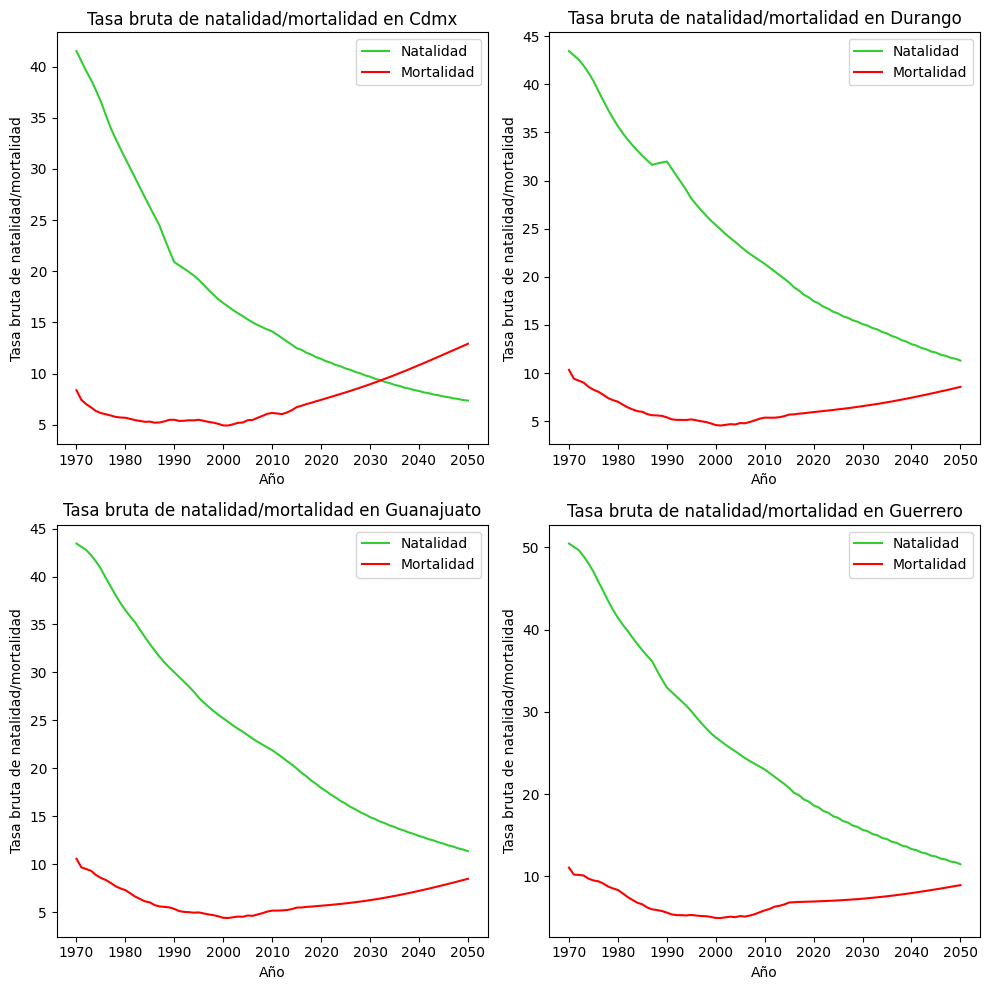

In [ ]:
# Filtrar los datos de cada estado
df_cdmx_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 9]
df_cdmx_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 9]
df_durango_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 10]
df_durango_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 10]
df_guanajuato_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 11]
df_guanajuato_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 11]
df_guerrero_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 12]
df_guerrero_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 12]

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Agregar los datos de Cdmx al primer subplot
axs[0,0].plot(df_cdmx_nat['año'], df_cdmx_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[0,0].plot(df_cdmx_def['año'], df_cdmx_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[0,0].set_xlabel('Año')
axs[0,0].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[0,0].set_title('Tasa bruta de natalidad/mortalidad en Cdmx')
axs[0,0].legend()

# Agregar los datos de Durango al segundo subplot
axs[0,1].plot(df_durango_nat['año'], df_durango_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[0,1].plot(df_durango_def['año'], df_durango_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[0,1].set_xlabel('Año')
axs[0,1].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[0,1].set_title('Tasa bruta de natalidad/mortalidad en Durango')
axs[0,1].legend()

# Agregar los datos de Guanajuato al tercer subplot
axs[1,0].plot(df_guanajuato_nat['año'], df_guanajuato_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[1,0].plot(df_guanajuato_def['año'], df_guanajuato_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[1,0].set_xlabel('Año')
axs[1,0].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[1,0].set_title('Tasa bruta de natalidad/mortalidad en Guanajuato')
axs[1,0].legend()

# Agregar los datos de Guerrero al cuarto subplot
axs[1,1].plot(df_guerrero_nat['año'], df_guerrero_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[1,1].plot(df_guerrero_def['año'], df_guerrero_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[1,1].set_xlabel('Año')
axs[1,1].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[1,1].set_title('Tasa bruta de natalidad/mortalidad en Guerrero')
axs[1,1].legend()

# Ajustar los espacios entre los subplots
fig.tight_layout()

# Mostrar el gráfico
plt.show()

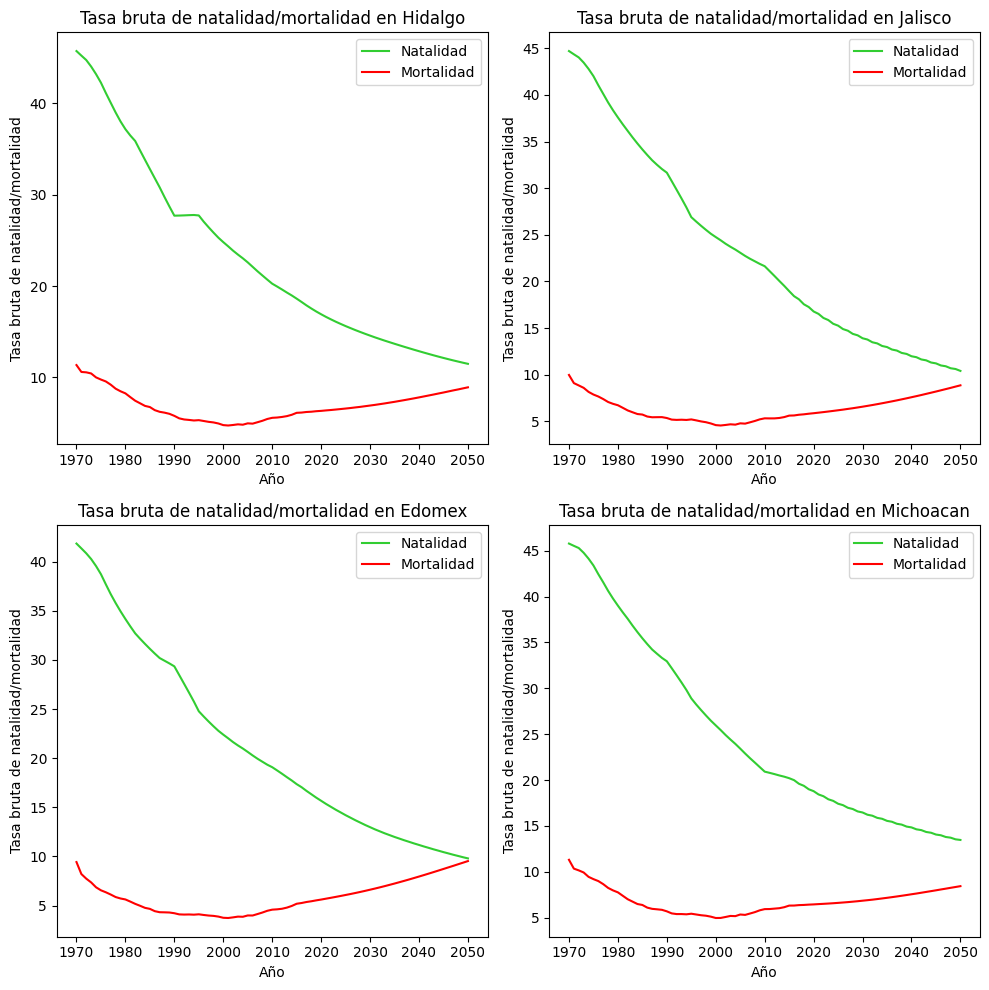

In [ ]:
# Filtrar los datos de cada estado
df_hidalgo_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 13]
df_hidalgo_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 13]
df_jalisco_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 14]
df_jalisco_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 14]
df_edomex_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 15]
df_edomex_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 15]
df_michoacan_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 16]
df_michoacan_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 16]

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Agregar los datos de Hidalgo al primer subplot
axs[0,0].plot(df_hidalgo_nat['año'], df_hidalgo_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[0,0].plot(df_hidalgo_def['año'], df_hidalgo_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[0,0].set_xlabel('Año')
axs[0,0].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[0,0].set_title('Tasa bruta de natalidad/mortalidad en Hidalgo')
axs[0,0].legend()

# Agregar los datos de Jalisco al segundo subplot
axs[0,1].plot(df_jalisco_nat['año'], df_jalisco_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[0,1].plot(df_jalisco_def['año'], df_jalisco_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[0,1].set_xlabel('Año')
axs[0,1].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[0,1].set_title('Tasa bruta de natalidad/mortalidad en Jalisco')
axs[0,1].legend()

# Agregar los datos de Estado de Mexico Sur al tercer subplot
axs[1,0].plot(df_edomex_nat['año'], df_edomex_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[1,0].plot(df_edomex_def['año'], df_edomex_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[1,0].set_xlabel('Año')
axs[1,0].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[1,0].set_title('Tasa bruta de natalidad/mortalidad en Edomex')
axs[1,0].legend()

# Agregar los datos de Michoacan al cuarto subplot
axs[1,1].plot(df_michoacan_nat['año'], df_michoacan_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[1,1].plot(df_michoacan_def['año'], df_michoacan_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[1,1].set_xlabel('Año')
axs[1,1].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[1,1].set_title('Tasa bruta de natalidad/mortalidad en Michoacan')
axs[1,1].legend()

# Ajustar los espacios entre los subplots
fig.tight_layout()

# Mostrar el gráfico
plt.show()


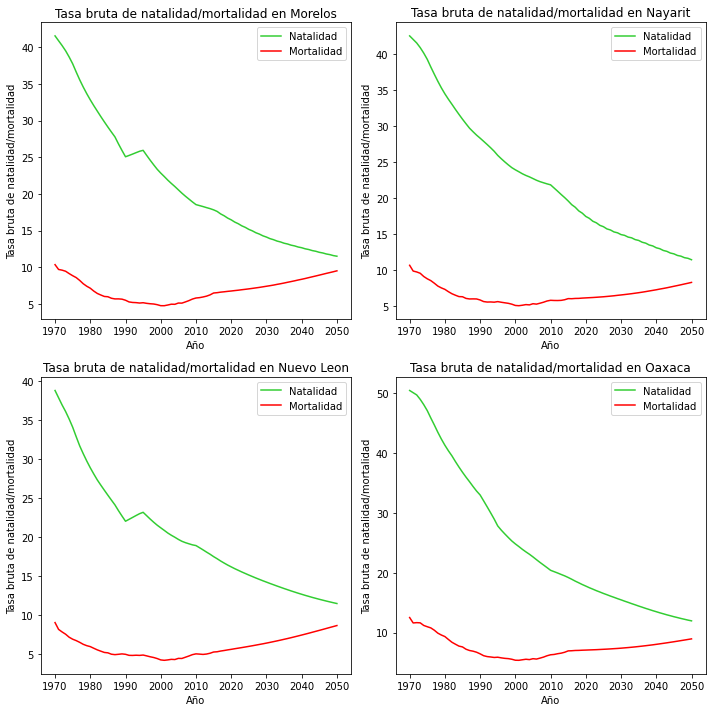

In [ ]:
# Filtrar los datos de cada estado
df_morelos_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 17]
df_morelos_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 17]
df_nayarit_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 18]
df_nayarit_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 18]
df_nuevo_leon_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 19]
df_nuevo_leon_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 19]
df_oaxaca_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 20]
df_oaxaca_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 20]

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Agregar los datos de Morelos al primer subplot
axs[0,0].plot(df_morelos_nat['año'], df_morelos_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[0,0].plot(df_morelos_def['año'], df_morelos_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[0,0].set_xlabel('Año')
axs[0,0].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[0,0].set_title('Tasa bruta de natalidad/mortalidad en Morelos')
axs[0,0].legend()

# Agregar los datos de Nayarit al segundo subplot
axs[0,1].plot(df_nayarit_nat['año'], df_nayarit_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[0,1].plot(df_nayarit_def['año'], df_nayarit_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[0,1].set_xlabel('Año')
axs[0,1].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[0,1].set_title('Tasa bruta de natalidad/mortalidad en Nayarit')
axs[0,1].legend()

# Agregar los datos de Nuevo Leon al tercer subplot
axs[1,0].plot(df_nuevo_leon_nat['año'], df_nuevo_leon_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[1,0].plot(df_nuevo_leon_def['año'], df_nuevo_leon_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[1,0].set_xlabel('Año')
axs[1,0].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[1,0].set_title('Tasa bruta de natalidad/mortalidad en Nuevo Leon')
axs[1,0].legend()

# Agregar los datos de Oaxaca al cuarto subplot
axs[1,1].plot(df_oaxaca_nat['año'], df_oaxaca_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[1,1].plot(df_oaxaca_def['año'], df_oaxaca_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[1,1].set_xlabel('Año')
axs[1,1].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[1,1].set_title('Tasa bruta de natalidad/mortalidad en Oaxaca')
axs[1,1].legend()

# Ajustar los espacios entre los subplots
fig.tight_layout()

# Mostrar el gráfico
plt.show()


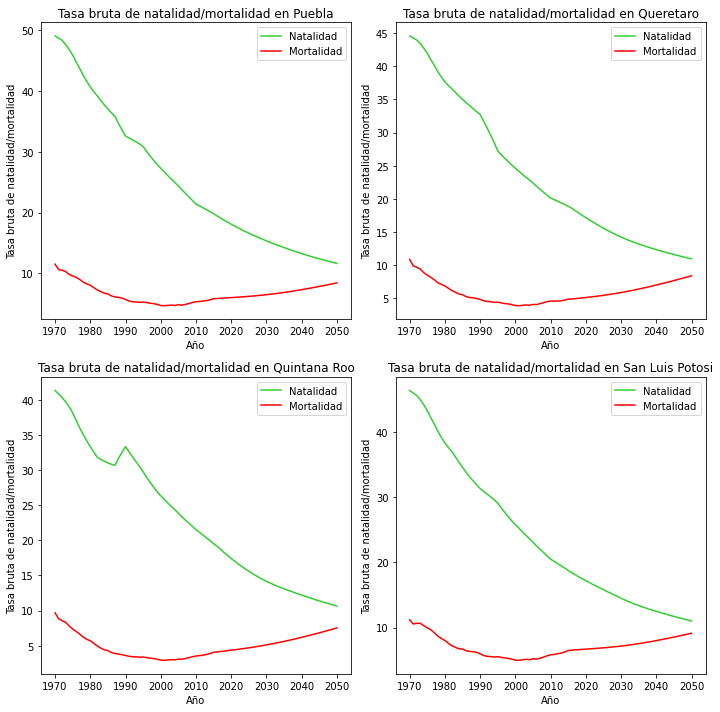

In [ ]:
# Filtrar los datos de cada estado
df_puebla_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 21]
df_puebla_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 21]
df_queretaro_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 22]
df_queretaro_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 22]
df_quintana_roo_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 23]
df_quintana_roo_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 23]
df_sluis_potosi_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 24]
df_sluis_potosi_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 24]

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Agregar los datos de Puebla al primer subplot
axs[0,0].plot(df_puebla_nat['año'], df_puebla_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[0,0].plot(df_puebla_def['año'], df_puebla_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[0,0].set_xlabel('Año')
axs[0,0].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[0,0].set_title('Tasa bruta de natalidad/mortalidad en Puebla')
axs[0,0].legend()

# Agregar los datos de Queretaro al segundo subplot
axs[0,1].plot(df_queretaro_nat['año'], df_queretaro_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[0,1].plot(df_queretaro_def['año'], df_queretaro_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[0,1].set_xlabel('Año')
axs[0,1].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[0,1].set_title('Tasa bruta de natalidad/mortalidad en Queretaro')
axs[0,1].legend()

# Agregar los datos de Quintana Roo al tercer subplot
axs[1,0].plot(df_quintana_roo_nat['año'], df_quintana_roo_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[1,0].plot(df_quintana_roo_def['año'], df_quintana_roo_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[1,0].set_xlabel('Año')
axs[1,0].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[1,0].set_title('Tasa bruta de natalidad/mortalidad en Quintana Roo')
axs[1,0].legend()

# Agregar los datos de San Luis Potosi al cuarto subplot
axs[1,1].plot(df_sluis_potosi_nat['año'], df_sluis_potosi_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[1,1].plot(df_sluis_potosi_def['año'], df_sluis_potosi_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[1,1].set_xlabel('Año')
axs[1,1].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[1,1].set_title('Tasa bruta de natalidad/mortalidad en San Luis Potosi')
axs[1,1].legend()

# Ajustar los espacios entre los subplots
fig.tight_layout()

# Mostrar el gráfico
plt.show()


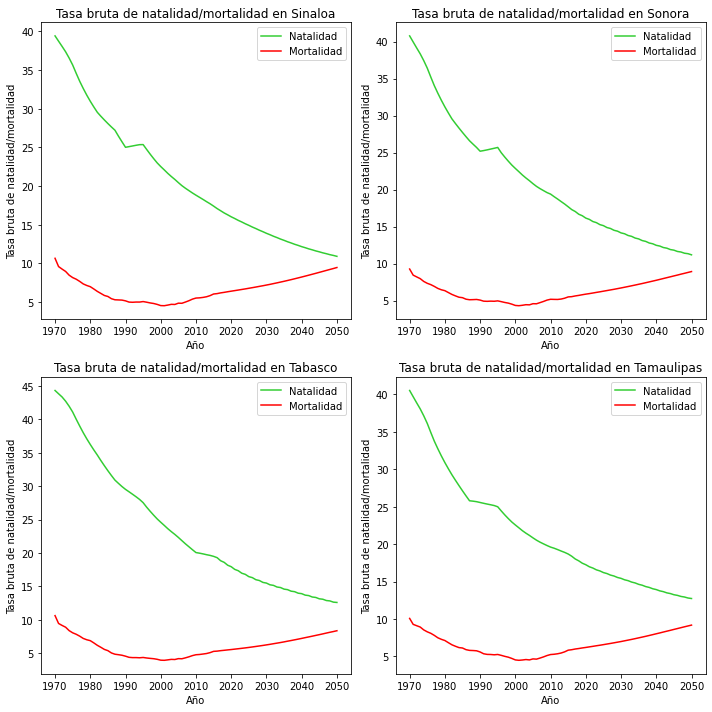

In [ ]:
# Filtrar los datos de cada estado
df_sinaloa_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 25]
df_sinaloa_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 25]
df_sonora_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 26]
df_sonora_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 26]
df_tabasco_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 27]
df_tabasco_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 27]
df_tamaulipas_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 28]
df_tamaulipas_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 28]

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Agregar los datos de Sinaloa al primer subplot
axs[0,0].plot(df_sinaloa_nat['año'], df_sinaloa_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[0,0].plot(df_sinaloa_def['año'], df_sinaloa_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[0,0].set_xlabel('Año')
axs[0,0].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[0,0].set_title('Tasa bruta de natalidad/mortalidad en Sinaloa')
axs[0,0].legend()

# Agregar los datos de Sonora al segundo subplot
axs[0,1].plot(df_sonora_nat['año'], df_sonora_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[0,1].plot(df_sonora_def['año'], df_sonora_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[0,1].set_xlabel('Año')
axs[0,1].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[0,1].set_title('Tasa bruta de natalidad/mortalidad en Sonora')
axs[0,1].legend()

# Agregar los datos de Tabasco al tercer subplot
axs[1,0].plot(df_tabasco_nat['año'], df_tabasco_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[1,0].plot(df_tabasco_def['año'], df_tabasco_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[1,0].set_xlabel('Año')
axs[1,0].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[1,0].set_title('Tasa bruta de natalidad/mortalidad en Tabasco')
axs[1,0].legend()

# Agregar los datos de Tamaulipas al cuarto subplot
axs[1,1].plot(df_tamaulipas_nat['año'], df_tamaulipas_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[1,1].plot(df_tamaulipas_def['año'], df_tamaulipas_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[1,1].set_xlabel('Año')
axs[1,1].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[1,1].set_title('Tasa bruta de natalidad/mortalidad en Tamaulipas')
axs[1,1].legend()

# Ajustar los espacios entre los subplots
fig.tight_layout()

# Mostrar el gráfico
plt.show()

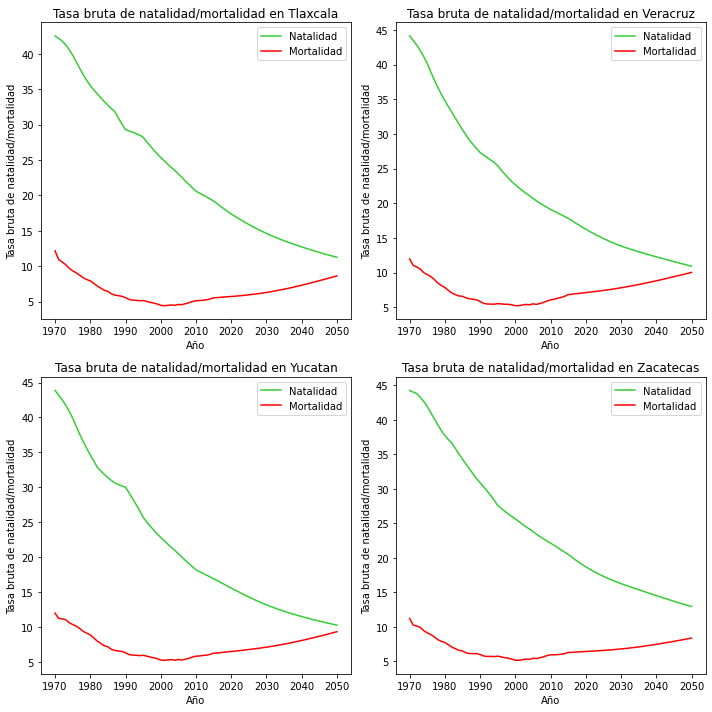

In [ ]:
# Filtrar los datos de cada estado
df_tlaxcala_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 29]
df_tlaxcala_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 29]
df_veracruz_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 30]
df_veracruz_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 30]
df_yucatan_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 31]
df_yucatan_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 31]
df_zacatecas_nat = dfNatalidad.loc[dfNatalidad['entidad federativa'] == 32]
df_zacatecas_def = dfDefunciones.loc[dfDefunciones['entidad federativa'] == 32]

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Agregar los datos de Tlaxcala al primer subplot
axs[0,0].plot(df_tlaxcala_nat['año'], df_tlaxcala_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[0,0].plot(df_tlaxcala_def['año'], df_tlaxcala_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[0,0].set_xlabel('Año')
axs[0,0].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[0,0].set_title('Tasa bruta de natalidad/mortalidad en Tlaxcala')
axs[0,0].legend()

# Agregar los datos de Veracruz al segundo subplot
axs[0,1].plot(df_veracruz_nat['año'], df_veracruz_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[0,1].plot(df_veracruz_def['año'], df_veracruz_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[0,1].set_xlabel('Año')
axs[0,1].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[0,1].set_title('Tasa bruta de natalidad/mortalidad en Veracruz')
axs[0,1].legend()

# Agregar los datos de Yucatan al tercer subplot
axs[1,0].plot(df_yucatan_nat['año'], df_yucatan_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[1,0].plot(df_yucatan_def['año'], df_yucatan_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[1,0].set_xlabel('Año')
axs[1,0].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[1,0].set_title('Tasa bruta de natalidad/mortalidad en Yucatan')
axs[1,0].legend()

# Agregar los datos de Zacatecas al cuarto subplot
axs[1,1].plot(df_zacatecas_nat['año'], df_zacatecas_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[1,1].plot(df_zacatecas_def['año'], df_zacatecas_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[1,1].set_xlabel('Año')
axs[1,1].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[1,1].set_title('Tasa bruta de natalidad/mortalidad en Zacatecas')
axs[1,1].legend()

# Ajustar los espacios entre los subplots
fig.tight_layout()

# Mostrar el gráfico
plt.show()


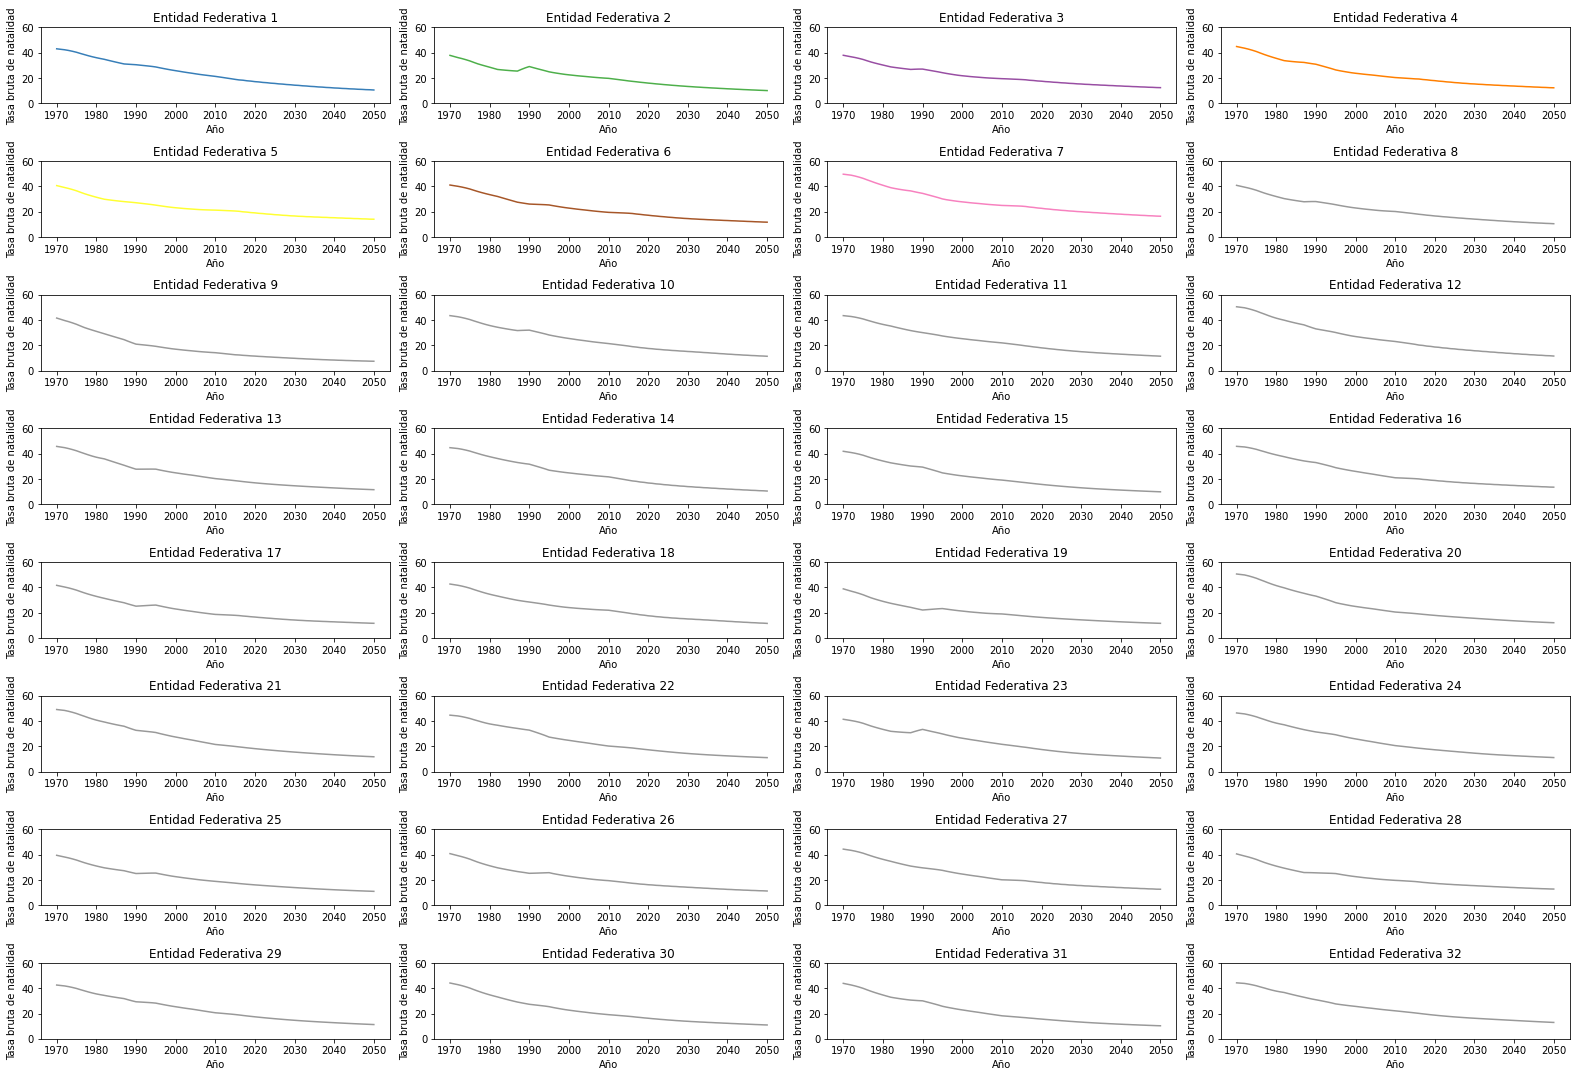

In [ ]:
# Definir la cantidad de filas y columnas de la matriz de gráficos
nrows = 8
ncols = 4

# Crear la figura y la matriz de gráficos con subplots()
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(22, 15))
palette = plt.get_cmap('Set1')
num=0

# Iterar a través de las entidades y generar un gráfico en cada eje
for i, ax in enumerate(axes.flat):
    num+=1
    entidad = i + 1  # La entidad empieza en 1
    df_filter = dfNatalidad.loc[dfNatalidad['entidad federativa'] == entidad]
    ax.plot(df_filter['año'], df_filter['tasa bruta de natalidad'], color=palette(num))
    ax.set_xlabel('Año')
    ax.set_ylabel('Tasa bruta de natalidad')
    ax.set_title('Entidad Federativa {}'.format(entidad))
    ax.set_ylim([0, 60])  # Establecer el rango del eje y para todos los gráficos

# Eliminar los ejes que no se utilizaron
for i in range(nrows*ncols, len(axes.flat)):
    axes.flat[i].axis('off')

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


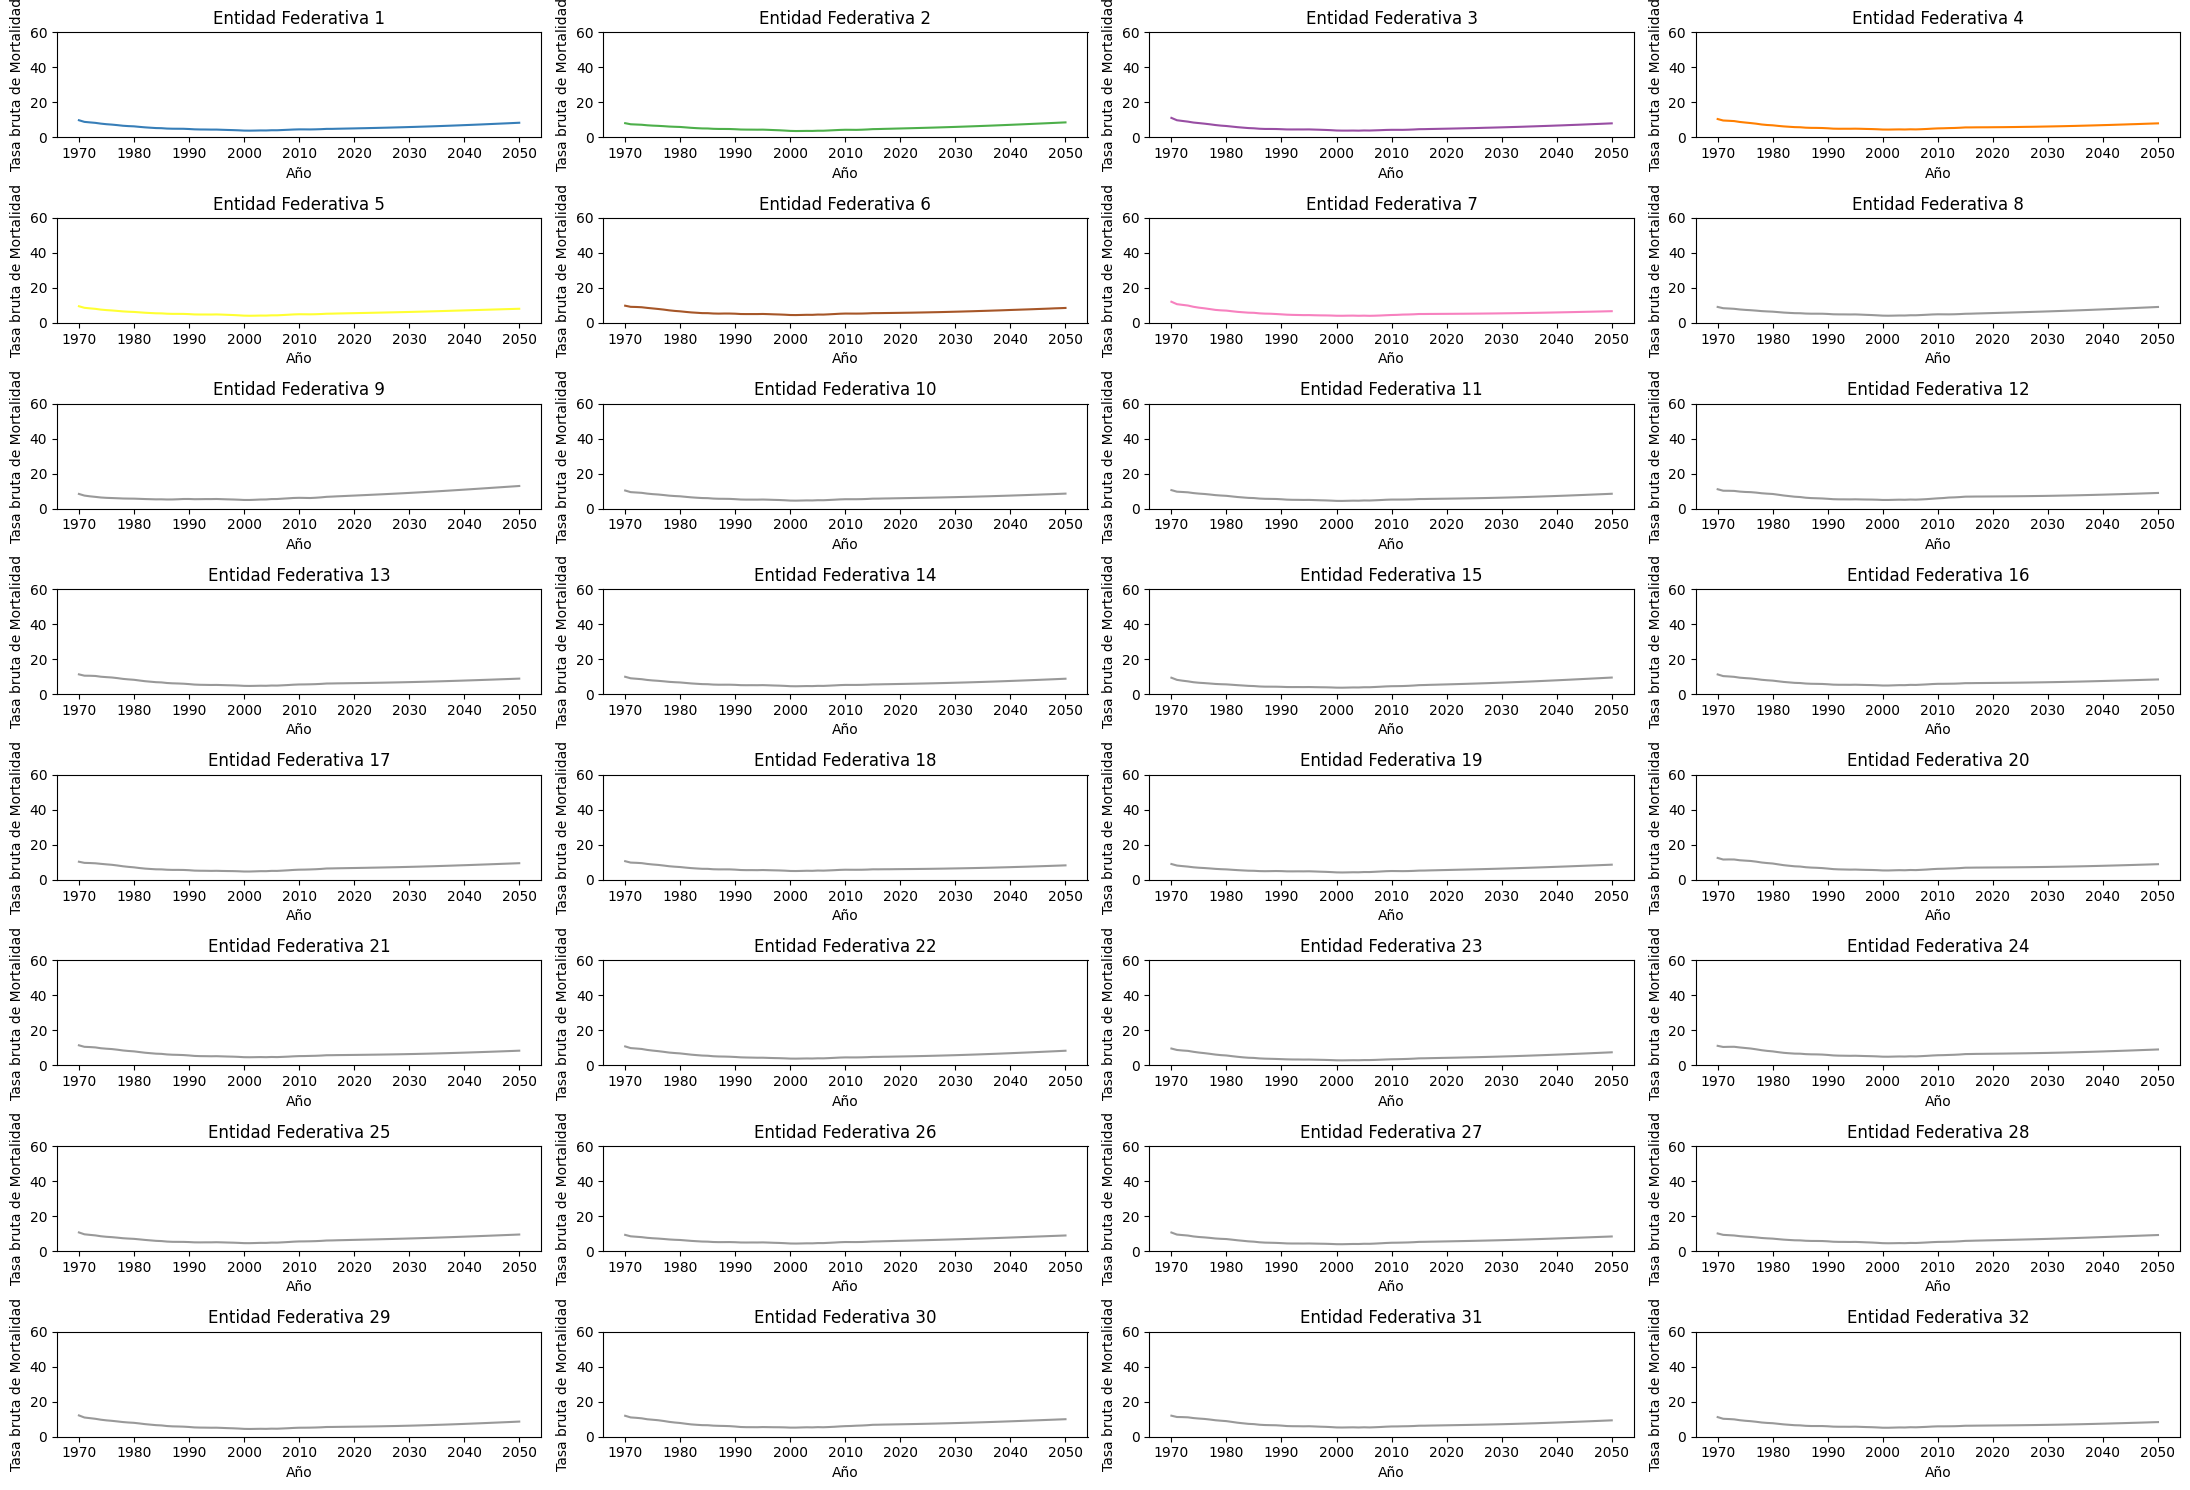

In [ ]:
# Definir la cantidad de filas y columnas de la matriz de gráficos
nrows = 8
ncols = 4

# Crear la figura y la matriz de gráficos con subplots()
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(22, 15))
palette = plt.get_cmap('Set1')
num=0

# Iterar a través de las entidades y generar un gráfico en cada eje
for i, ax in enumerate(axes.flat):
    num+=1
    entidad = i + 1  # La entidad empieza en 1
    df_filter = dfDefunciones.loc[dfDefunciones['entidad federativa'] == entidad]
    ax.plot(df_filter['año'], df_filter['tasa bruta de mortalidad'], color=palette(num))
    ax.set_xlabel('Año')
    ax.set_ylabel('Tasa bruta de Mortalidad')
    ax.set_title('Entidad Federativa {}'.format(entidad))
    ax.set_ylim([0, 60])  # Establecer el rango del eje y para todos los gráficos

# Eliminar los ejes que no se utilizaron
for i in range(nrows*ncols, len(axes.flat)):
    axes.flat[i].axis('off')

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

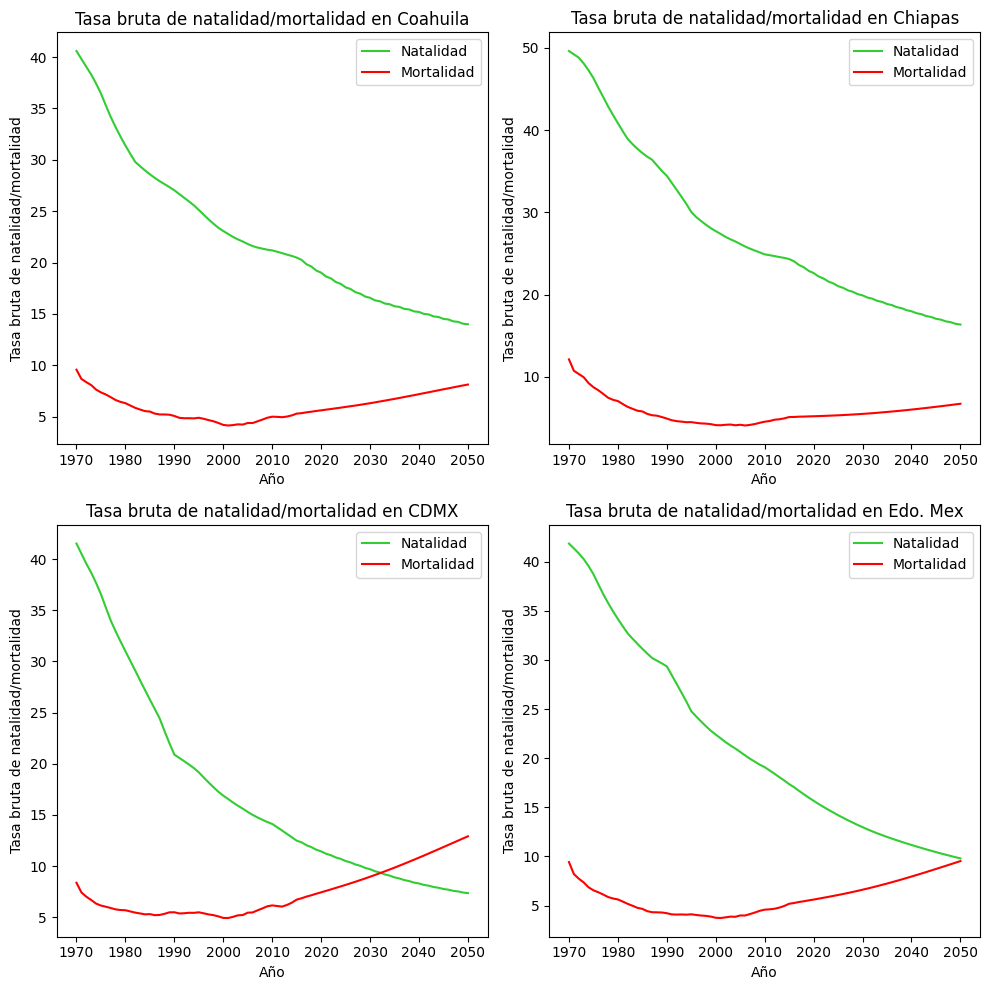

In [ ]:
# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Agregar los datos de Tlaxcala al primer subplot
axs[0,0].plot(df_coahuila_nat['año'], df_coahuila_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[0,0].plot(df_coahuila_def['año'], df_coahuila_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[0,0].set_xlabel('Año')
axs[0,0].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[0,0].set_title('Tasa bruta de natalidad/mortalidad en Coahuila')
axs[0,0].legend()

# Agregar los datos de Veracruz al segundo subplot
axs[0,1].plot(df_chiapas_nat['año'], df_chiapas_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[0,1].plot(df_chiapas_def['año'], df_chiapas_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[0,1].set_xlabel('Año')
axs[0,1].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[0,1].set_title('Tasa bruta de natalidad/mortalidad en Chiapas')
axs[0,1].legend()

# Agregar los datos de Yucatan al tercer subplot
axs[1,0].plot(df_cdmx_nat['año'], df_cdmx_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[1,0].plot(df_cdmx_def['año'], df_cdmx_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[1,0].set_xlabel('Año')
axs[1,0].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[1,0].set_title('Tasa bruta de natalidad/mortalidad en CDMX')
axs[1,0].legend()

# Agregar los datos de Zacatecas al cuarto subplot
axs[1,1].plot(df_edomex_nat['año'], df_edomex_nat['tasa bruta de natalidad'], color='limegreen', label='Natalidad')
axs[1,1].plot(df_edomex_def['año'], df_edomex_def['tasa bruta de mortalidad'], color='red', label='Mortalidad')
axs[1,1].set_xlabel('Año')
axs[1,1].set_ylabel('Tasa bruta de natalidad/mortalidad')
axs[1,1].set_title('Tasa bruta de natalidad/mortalidad en Edo. Mex')
axs[1,1].legend()

# Ajustar los espacios entre los subplots
fig.tight_layout()

# Mostrar el gráfico
plt.show()